In [1]:
# things to upload 
from astropy.io import fits
import numpy as np
from math import *
from matplotlib.cm import ScalarMappable
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.coordinates import Distance
from astropy.cosmology import z_at_value
from astropy.cosmology import LambdaCDM
from astropy import units as u
import pandas as pd
import scipy as sc

# updated to match brian 
cosmo = LambdaCDM(H0=70, Om0=0.27, Ode0=0.73)

## goal 

make some plots with only the spec stuff
- spec spec pairs (that I trust..)
    - yes q flag check 
- vs other spec galaxies in hyperion box 
    - no q flag check
    
    
plots to make 
- sfr vs dgal in bins 
    - pair and not 
- sfr enhancement func of dgal
    - pair SFR / not SFR
- mass distribtion of pair vs not
    - also mass dist in dgal bins 
- fraction of pair as func of environment
- to look... 
    - z dist 
    - dgal dist
    

In [2]:
# get IDs stuff

file = open("/Users/finngiddings/Documents/699-1/Data/Master COSMOS/master_specz_COSMOS_BF_v2.cat","r")
string = file.read()
lst = string.splitlines()
file.close()

ID = [] #0 
ra = [] # us 3 C20 4
dec = [] # us 5 C20 6
z_spec = [] # 11
mass = [] # 15 is the median from LP with z spec
sfr = [] # 18 median
age = [] # 21 median
u = [] # 25 from lp
r = [] # 26 from lp 
NUV = [] # 24 from
J = [] # 28 from lp

K = [] # 7
i = [] # 9 

survey = [] # 

# for data frame 
all_dat = []

qs = 0
for x in lst:
    temp = x.split()
    if (float(temp[0]) != -99.0):
        if (float(temp[11]) >= 2.35) and (float(temp[11]) <= 2.55):
            if (float(temp[3]) >= 149.6) and (float(temp[3]) <= 150.52):
                if (float(temp[5]) >= 1.74) and (float(temp[5]) <= 2.73):
                    if (float(temp[15]) != -99.0):
                        if temp[14] != "SINGLEMATCH":
                            qs +=1 
                        if (temp[14] == "SINGLEMATCH") or (temp[14] == "MULTIMATCH-Q4") or (temp[14][12] == "3"):
                        #print("spec:", temp[11], " photo:", temp[12])
                            #print(temp[14])
                            ID.append(int(temp[0]))
                            z_spec.append(float(temp[11]))
                            ra.append(float(temp[3]))
                            dec.append(float(temp[5]))
                            mass.append(float(temp[15]))
                            sfr.append(float(temp[18]))
                            age.append(float(temp[21]))
                            u.append(float(temp[25]))
                            r.append(float(temp[26]))
                            NUV.append(float(temp[24]))
                            J.append(float(temp[28]))
                            K.append(float(temp[7]))
                            i.append(float(temp[9]))
                            survey.append(temp[2])
                            all_dat.append([int(temp[0]),float(temp[3]),float(temp[5]),float(temp[11]),float(temp[15]),
                                        float(temp[18]),float(temp[24]),float(temp[25]),float(temp[26]),float(temp[28])])

                                                    
print(len(ID))
print(qs)

878
11


In [3]:
## REMOVE BAD IRAC ONES 
# path and open the file 
path = "/Users/finngiddings/Documents/699-1/Data/COSMOS 2020/v2.0/COSMOS2020_CLASSIC_R1_v2.0.fits"
file = fits.open(path)

# get the data 
data = file[1].data
data_what = file[0].data
file.close()


all_dat2 = []
for x in all_dat:
    if (data[x[0]-1][548] < 25.7) and (data[x[0]-1][552] < 25.6):
        if np.isnan(data[x[0]-1][548]) or np.isnan(data[x[0]-1][552]):
            continue
        else:
            all_dat2.append(x)

print(np.shape(all_dat2))
        

(829, 10)


In [4]:
labels = ["ID","RA","DEC","z","M","SFR","NUV","u","r","J"]

In [5]:
gals = pd.DataFrame(data = all_dat2,columns =labels)

In [6]:
gals

,ID,RA,DEC,z,M,SFR,NUV,u,r,J
0,335852,149.749588,1.741531,2.4074,9.33231,0.892688,-20.096,-21.369,-20.940,-21.331
1,339984,149.773560,1.745023,2.5091,9.07761,1.628740,-20.665,-21.023,-21.064,-21.135
2,340242,149.814850,1.744979,2.3531,9.25402,1.891940,-20.391,-21.096,-21.641,-21.380
3,345894,149.976685,1.750714,2.4122,9.57869,1.222510,-21.057,-22.099,-21.713,-21.771
4,346841,149.920212,1.751179,2.3902,10.12810,1.249940,-21.381,-21.950,-22.445,-22.701
...,...,...,...,...,...,...,...,...,...,...
824,1277921,150.385650,2.634293,2.3768,9.26190,1.424010,-20.369,-20.957,-21.399,-21.220
825,1278201,150.025207,2.634014,2.4500,10.60870,1.793130,-20.553,-22.120,-22.794,-23.584
826,1297195,150.378420,2.653405,2.4758,8.98808,0.970041,-20.323,-21.066,-20.621,-20.264
827,1297272,150.338620,2.651640,2.5256,9.64518,2.299820,-21.308,-22.017,-22.408,-22.232


In [7]:
## GET PAIRS 
# set the path 
path = "/Users/finngiddings/Documents/699-1/Data/MC Runs Official2/modZpairs-1.cat"
file = open(path,"r")
string = file.read()
lst = string.splitlines()
file.close()

In [8]:
pairid = []
pairidss =[]
pairidsp = []
pairidpp = []

pairidss_dub=[]




In [9]:
proj_seps = []

In [10]:
for x in lst:
    temp = x.split()
    if x[0] == "#":
        continue
    else:
        pairid.append(int(temp[1]))
        pairid.append(int(temp[8]))
        if int(temp[0]) >= 829:
            pairidpp.append(int(temp[1]))
            pairidpp.append(int(temp[8]))
        elif int(temp[0]) < 829 and int(temp[7]) >= 829:
            #print(temp[0],temp[7],"sp")
            pairidsp.append(int(temp[1]))
            pairidsp.append(int(temp[8]))
        else:
            #print(temp[0],temp[7],"ss")
            pairidss.append(int(temp[1]))
            pairidss.append(int(temp[8]))
            pairidss_dub.append([int(temp[1]),int(temp[8])])
            proj_seps.append(float(temp[14]))

print(len(pairid))
print(len(pairidss),len(pairidsp),len(pairidpp))
        

1186
38 198 950


(array([2., 2., 1., 3., 1., 1., 1., 3., 1., 4.]),
 array([0.0233575 , 0.03405729, 0.04475708, 0.05545687, 0.06615666,
        0.07685645, 0.08755623, 0.09825602, 0.10895581, 0.1196556 ,
        0.13035539]),
 <BarContainer object of 10 artists>)

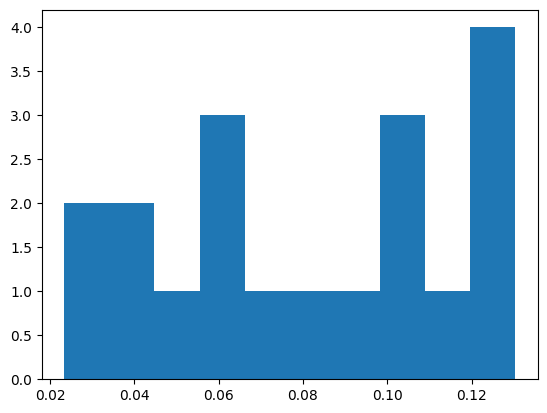

In [11]:
plt.hist(proj_seps)

In [12]:
print(np.min(proj_seps))
print(np.argmin(proj_seps))

0.02335750038867087
16


In [13]:
for x in proj_seps:
    if x < 0.05:
        print(x)
        #break

0.027405486437828277
0.045425278978415855
0.042871714117472454
0.02335750038867087
0.03774604536506113


In [14]:
proj_seps[17]

0.03774604536506113

In [15]:
pairidss_dub[17]

[1116891, 1119250]

In [16]:
len(proj_seps)

19

In [17]:
len(pairidss_dub)

19

# get overdensities 

In [18]:
# from 1 - overdense cat 
def mapPoint(ra_act,dec_act,ra_pix,dec_pix,ra_cent,dec_cent,ra_corr,dec_corr):
    ra_new = round(ra_pix - (ra_cent - ra_act) / ra_corr,0)
    dec_new = round(dec_pix - (dec_cent - dec_act) / dec_corr,0)
    # CHANGED FOR NEGATIVES NOW
    return ra_new, dec_new


def findPoint(ra,dec,z,file):
    # set high number for z diff to start
    best_diff = 10 
    # what HDU should we use 
    hdu_id = 0
    
    # find z_mid closest to z actual 
    for x in range(184,266):
        z_mid = np.mean([file[x].header[20], file[x].header[19]])
        #print(type(z_mid))
        #print(type(z))
        if abs(z_mid - z) < best_diff:
            best_diff = abs(z_mid - z)
            hdu_id = x 
            #print(hdu_id, best_diff)
    
    #print(hdu_id)
    ra_pix, dec_pix = mapPoint(ra,dec,file[hdu_id].header[15],file[hdu_id].header[16],file[hdu_id].header[13],file[hdu_id].header[14],
                    file[hdu_id].header[17],file[hdu_id].header[18])
    return hdu_id, ra_pix, dec_pix


def getDens(ra,dec,z,file):
    x, ra_pix, dec_pix = findPoint(ra,dec,z,file)
    #print(x,ra_pix,dec_pix)
    if ra_pix >= np.shape(file[int(x)])[0] or dec_pix >= np.shape(file[int(x)])[1]:
        return -99
    elif ra_pix < 0 or dec_pix < 0:
        return -99 
    else:
        return file[int(x)].data[int(dec_pix)][int(ra_pix)],x

In [19]:
def getSig(dgal,file,hdu_id): # THIS FUNCTION SUCK
    temp = file[hdu_id].data.flatten()
    temp = np.extract(np.where(temp>-1,True,False),temp)
    std = np.std(temp)
    return (dgal - np.mean(temp)) / std

In [58]:
def getDgal(ra,dec,z,file):
    dgal = []
    for x in range(len(ra)):
        temp,temp2 = getDens(ra[x],dec[x],z[x],file)
        dgal.append(temp)
        
    return dgal

In [21]:
path = "/Users/finngiddings/Documents/699-1/Data/Overdensity/masterallz.COSMOS.mastermedVoronoi.specprobabilistic.overdens.100interations.fits"
file = fits.open(path)

In [22]:
#dgal,sigma = getDgal(gals["RA"],gals["DEC"],gals["z"],file)
#print(len(dgal),len(sigma))
dgal = getDgal(gals["RA"],gals["DEC"],gals["z"],file)
print(len(dgal))

829


In [23]:
gals.insert(6,"Dgal",dgal)
#gals.insert(7,"sig",sigma)

In [24]:
gals

,ID,RA,DEC,z,M,SFR,Dgal,NUV,u,r,J
0,335852,149.749588,1.741531,2.4074,9.33231,0.892688,0.007612,-20.096,-21.369,-20.940,-21.331
1,339984,149.773560,1.745023,2.5091,9.07761,1.628740,0.164052,-20.665,-21.023,-21.064,-21.135
2,340242,149.814850,1.744979,2.3531,9.25402,1.891940,0.059990,-20.391,-21.096,-21.641,-21.380
3,345894,149.976685,1.750714,2.4122,9.57869,1.222510,-0.041115,-21.057,-22.099,-21.713,-21.771
4,346841,149.920212,1.751179,2.3902,10.12810,1.249940,0.107208,-21.381,-21.950,-22.445,-22.701
...,...,...,...,...,...,...,...,...,...,...,...
824,1277921,150.385650,2.634293,2.3768,9.26190,1.424010,0.093113,-20.369,-20.957,-21.399,-21.220
825,1278201,150.025207,2.634014,2.4500,10.60870,1.793130,-0.068683,-20.553,-22.120,-22.794,-23.584
826,1297195,150.378420,2.653405,2.4758,8.98808,0.970041,0.159443,-20.323,-21.066,-20.621,-20.264
827,1297272,150.338620,2.651640,2.5256,9.64518,2.299820,0.059931,-21.308,-22.017,-22.408,-22.232


In [25]:
file.close()

In [26]:
# create arrays with the values 
z_peak = [2.468,2.426,2.444,2.469,2.507,2.492,2.423]
rex = [3.37,2.31,1.94,2.77,1.05,0.88,1.22]
rey = [4.07,3.25,1.82,2.12,1.27,1.05,0.90]
rez = [7.76,5.18,6.15,6.00,4.07,5.83,2.71]
ra_struc = [150.0937,149.9765,149.9996,150.2556,150.2293, 150.3316,149.9581]
dec_struc = [2.4049,2.1124,2.2537, 2.3423,2.3381,2.2427,2.2187]

In [27]:
# radius finder function

def getRadius(ra,dec,z,raS,decS,zS,cosmo):
    # get sep in Mpc for ra and dec 
    ra_diff = coordRad(ra,raS,z,zS,cosmo)
    dec_diff = coordRad(dec,decS,z,zS,cosmo)
    
    # z sep 
    #z_diff = abs(cosmo.comoving_distance(z) - cosmo.comoving_distance(zS)).value
    #print(z_diff,ra_diff,dec_diff)
    return sqrt(ra_diff**2 + dec_diff**2)
    
# coord func 
def coordRad(c,cS,z,zS,cosmo):
    ang_sep = abs((c *pi /180) - (cS*pi /180))
    # average z dist 
    #dist = (Distance(z=z,cosmology=cosmo)/(1+z) + Distance(z=zS,cosmology=cosmo)/(1+zS)) / 2
    #dist = ((cosmo.comoving_distance(z)) + (cosmo.comoving_distance(zS))) /2
    dist = cosmo.comoving_distance((z+zS)/2)
    return dist.value * ang_sep


def findStruc(ra,dec,z,z_peak,ra_struc,dec_struc,cosmo):
    # set large sep to start 
    best_dist = 500
    struc_id = -1
    # first find distance in coordinates, with loop 
    for x in range(len(ra_struc)):
        temp = getRadius(ra,dec,z,ra_struc[x],dec_struc[x],z_peak[x],cosmo)
        #print(temp)
        if temp < best_dist:
            struc_id = x 
            best_dist = temp
            
    
    if struc_id == -1:
        print("bad")
    #print(struc_id)
    return struc_id, best_dist #  -- put here if needed later



def calcRnorm(ra,dec,z,ra_struc,dec_struc,z_peak,rex,rey,rez,cosmo):
    best_id, best_dist  = findStruc(ra,dec,z,z_peak,ra_struc,dec_struc,cosmo)
    #print(best_id)
    
    return best_dist / sqrt(rex[best_id]**2 +rey[best_id]**2), best_id + 1 

In [28]:
# array for cluster distance metric 

r_norm = []
struc_num = []

for x in range(len(gals)):
    temp, temp2 = calcRnorm(gals["RA"].iloc[x],gals["DEC"].iloc[x],gals["z"].iloc[x],ra_struc,dec_struc,z_peak,rex,rey,rez,cosmo)
    r_norm.append(temp)
    struc_num.append(temp2)
    
    
print(len(r_norm))

829


In [29]:
gals.insert(7,"Rnorm",r_norm)

In [30]:
gals

,ID,RA,DEC,z,M,SFR,Dgal,Rnorm,NUV,u,r,J
0,335852,149.749588,1.741531,2.4074,9.33231,0.892688,0.007612,11.220750,-20.096,-21.369,-20.940,-21.331
1,339984,149.773560,1.745023,2.5091,9.07761,1.628740,0.164052,10.948426,-20.665,-21.023,-21.064,-21.135
2,340242,149.814850,1.744979,2.3531,9.25402,1.891940,0.059990,10.298941,-20.391,-21.096,-21.641,-21.380
3,345894,149.976685,1.750714,2.4122,9.57869,1.222510,-0.041115,9.339165,-21.057,-22.099,-21.713,-21.771
4,346841,149.920212,1.751179,2.3902,10.12810,1.249940,0.107208,9.417460,-21.381,-21.950,-22.445,-22.701
...,...,...,...,...,...,...,...,...,...,...,...,...
824,1277921,150.385650,2.634293,2.3768,9.26190,1.424010,0.093113,9.442328,-20.369,-20.957,-21.399,-21.220
825,1278201,150.025207,2.634014,2.4500,10.60870,1.793130,-0.068683,4.698767,-20.553,-22.120,-22.794,-23.584
826,1297195,150.378420,2.653405,2.4758,8.98808,0.970041,0.159443,9.983608,-20.323,-21.066,-20.621,-20.264
827,1297272,150.338620,2.651640,2.5256,9.64518,2.299820,0.059931,9.609228,-21.308,-22.017,-22.408,-22.232


In [31]:
ssfr = []
for x in range(len(gals)):
    ssfr.append(log10((10**gals["SFR"][x])/(10**gals["M"][x])))
    
print(len(ssfr))


gals["sSFR"] = ssfr
#log10((10**sfr[x])/(10**mass[x]))

829


In [32]:
gals

,ID,RA,DEC,z,M,SFR,Dgal,Rnorm,NUV,u,r,J,sSFR
0,335852,149.749588,1.741531,2.4074,9.33231,0.892688,0.007612,11.220750,-20.096,-21.369,-20.940,-21.331,-8.439622
1,339984,149.773560,1.745023,2.5091,9.07761,1.628740,0.164052,10.948426,-20.665,-21.023,-21.064,-21.135,-7.448870
2,340242,149.814850,1.744979,2.3531,9.25402,1.891940,0.059990,10.298941,-20.391,-21.096,-21.641,-21.380,-7.362080
3,345894,149.976685,1.750714,2.4122,9.57869,1.222510,-0.041115,9.339165,-21.057,-22.099,-21.713,-21.771,-8.356180
4,346841,149.920212,1.751179,2.3902,10.12810,1.249940,0.107208,9.417460,-21.381,-21.950,-22.445,-22.701,-8.878160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,1277921,150.385650,2.634293,2.3768,9.26190,1.424010,0.093113,9.442328,-20.369,-20.957,-21.399,-21.220,-7.837890
825,1278201,150.025207,2.634014,2.4500,10.60870,1.793130,-0.068683,4.698767,-20.553,-22.120,-22.794,-23.584,-8.815570
826,1297195,150.378420,2.653405,2.4758,8.98808,0.970041,0.159443,9.983608,-20.323,-21.066,-20.621,-20.264,-8.018039
827,1297272,150.338620,2.651640,2.5256,9.64518,2.299820,0.059931,9.609228,-21.308,-22.017,-22.408,-22.232,-7.345360


In [33]:
len(gals[gals["Dgal"]>0.2])

222

In [34]:
# create new data frames 

#pair = gals[gals["ID"].isin(pairid)]
pairss = gals[gals["ID"].isin(pairidss)]
pairsp = gals[gals["ID"].isin(pairidsp)]
#pairpp = gals[gals["ID"].isin(pairidpp)]
other = gals[(np.logical_not(gals["ID"].isin(pairidss)))]

In [35]:
len(pairsp)

91

In [36]:
len(pairss)

34

In [37]:
len(other)

795

In [38]:
bad_pair = [506812,508214,547299,548174,880255,882963,1116047,1117098]
dex = []
new_dex = []
for x in range(len(pairss)):
    if pairss["ID"].iloc[x] in bad_pair:
        #print(x)
        new_dex.append(x)
        dex.append(pairss.index[x])
        #other[len(other)] = pairss.index[x]
        
print(len(dex)) # should be 8

8


In [39]:
dex

[116, 118, 158, 160, 492, 494, 739, 741]

In [40]:
#for x in new_dex:
 #   other = pd.concat([other,pairss.iloc[x:x+1]],axis="index")

    ## UNDOING THIS

In [41]:
len(other) 

795

In [42]:
pairss_good = pairss.drop(dex)

In [43]:
print(len(pairss_good))
pairss_good

26


,ID,RA,DEC,z,M,SFR,Dgal,Rnorm,NUV,u,r,J,sSFR
35,381028,149.963318,1.785379,2.3980,9.34175,1.703620,0.103908,8.438077,-20.944,-21.514,-21.767,-21.644,-7.638130
38,384103,149.965960,1.788798,2.3873,9.16240,0.912620,0.006851,8.337901,-19.257,-20.284,-20.636,-20.416,-8.249780
224,600078,149.836594,1.996312,2.5496,9.63143,2.285140,0.047033,4.762230,-21.183,-21.819,-22.140,-22.507,-7.346290
227,601602,149.839508,1.998243,2.5460,9.38620,1.407010,0.038479,4.669472,-21.118,-21.501,-21.584,-21.024,-7.979190
366,754726,149.953910,2.142624,2.4226,9.21264,1.114290,0.420315,0.975400,-20.164,-21.119,-21.104,-21.085,-8.098350
367,754815,149.955840,2.142755,2.4193,9.09270,1.440980,0.410103,0.948840,-20.168,-20.994,-21.226,-20.934,-7.651720
430,824437,149.988956,2.206343,2.4638,9.34645,1.413680,0.146612,2.268938,-19.522,-21.041,-21.366,-21.495,-7.932770
432,827014,149.988346,2.207023,2.4598,10.55340,2.298650,0.235712,2.212265,-21.623,-22.993,-23.717,-23.975,-8.254750
435,832715,149.992927,2.213561,2.4236,10.61450,1.379840,0.320166,2.392908,-20.284,-21.590,-22.680,-23.306,-9.234660
438,834502,149.988856,2.214684,2.4262,10.66170,1.867130,0.374405,2.108890,-20.462,-22.267,-23.168,-23.606,-8.794570


In [44]:
nonpair_pre = other

In [45]:
len(nonpair_pre)

795

In [46]:
nonpair = other[np.logical_not(other["ID"].isin(pairidsp))]


In [47]:
dubs = []
for x in pairidsp:
    if x in pairidss:
        if x in dubs:
            continue
        else:
            dubs.append(x)
            
print(len(nonpair)+len(pairss)+len(pairsp)-len(dubs))

829


In [48]:
nonpair # This is with removed sp pairs...

,ID,RA,DEC,z,M,SFR,Dgal,Rnorm,NUV,u,r,J,sSFR
0,335852,149.749588,1.741531,2.4074,9.33231,0.892688,0.007612,11.220750,-20.096,-21.369,-20.940,-21.331,-8.439622
1,339984,149.773560,1.745023,2.5091,9.07761,1.628740,0.164052,10.948426,-20.665,-21.023,-21.064,-21.135,-7.448870
2,340242,149.814850,1.744979,2.3531,9.25402,1.891940,0.059990,10.298941,-20.391,-21.096,-21.641,-21.380,-7.362080
3,345894,149.976685,1.750714,2.4122,9.57869,1.222510,-0.041115,9.339165,-21.057,-22.099,-21.713,-21.771,-8.356180
4,346841,149.920212,1.751179,2.3902,10.12810,1.249940,0.107208,9.417460,-21.381,-21.950,-22.445,-22.701,-8.878160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,1277921,150.385650,2.634293,2.3768,9.26190,1.424010,0.093113,9.442328,-20.369,-20.957,-21.399,-21.220,-7.837890
825,1278201,150.025207,2.634014,2.4500,10.60870,1.793130,-0.068683,4.698767,-20.553,-22.120,-22.794,-23.584,-8.815570
826,1297195,150.378420,2.653405,2.4758,8.98808,0.970041,0.159443,9.983608,-20.323,-21.066,-20.621,-20.264,-8.018039
827,1297272,150.338620,2.651640,2.5256,9.64518,2.299820,0.059931,9.609228,-21.308,-22.017,-22.408,-22.232,-7.345360


## Remove projected pairs with larger delta z 

so remove all that have possible within 0.06.... 6000 kms 
- based on the median sigma zphot from pc binary 2 (since thats before new IRAC cut.. with new its pretty much the same

In [49]:
# find proj sep
def projSep(ra1,ra2,dec1,dec2,z1,z2,dist1,dist2):
    coord1 = SkyCoord(ra=ra1, dec=dec1,unit="deg")
    coord2 = SkyCoord(ra=ra2,dec=dec2,unit="deg")
    ang_sep = coord1.separation(coord2).radian
    #print(ang_sep)
    dist = np.mean([dist1,dist2])
    return dist * ang_sep

# given 2 vel compute absolute diff
def velDiff(z1,z2):
    c = 2.99792458e5 # kms
    vel = (c * abs(z1-z2))/(1+np.mean([z1,z2]))
    return vel

# dist getter
def getDist(z,cosmo):
    # if single one 
    if len([z])== 1:
        return cosmo.comoving_distance(z).value / (1+z)
    dist = []
    for x in z:
        dist.append(cosmo.comoving_distance(x).value / (1+x))
    return dist

In [50]:
# load in phot galaxies 
# now for COSMOS ones part

# path and open the file 
path = "/Users/finngiddings/Documents/699-1/Data/hypPhotFromCOS.cat"
file = open(path,"r")

# get the data 
string = file.read()
lst = string.splitlines()
file.close()

In [51]:
# add to existing arrays
all_dat = []
for x in lst:
    temp = x.split()
    if x[0] =="#":
        continue
    all_dat.append([int(temp[0]),float(temp[1]),float(temp[2]),float(temp[7]),float(temp[9]),float(temp[10]),
                    float(temp[14]),float(temp[12]),float(temp[13]),float(temp[15])])

In [52]:
labels = ["ID","RA","DEC","z","M","SFR","NUV","u","r","J"]

In [53]:
phots = pd.DataFrame(data = all_dat,columns =labels)

In [54]:
phots

,ID,RA,DEC,z,M,SFR,NUV,u,r,J
0,333976,150.309549,1.740036,2.4574,10.73244,1.39196,-19.51606,-21.08581,-22.10656,-23.59179
1,334210,150.329078,1.740163,2.5402,9.74656,0.91537,-19.19065,-20.00852,-21.02502,-21.34988
2,334293,150.343888,1.740159,2.4835,8.88671,0.34198,-19.52352,-19.60773,-19.89440,-20.26287
3,334667,150.374231,1.740015,2.4332,9.34695,1.04338,-20.45748,-20.91790,-21.50975,-21.42037
4,334791,150.243457,1.740526,2.5307,9.17633,1.13924,-19.87602,-20.53771,-20.96211,-21.11570
...,...,...,...,...,...,...,...,...,...,...
8305,1375665,150.108416,2.729000,2.3770,10.83379,2.04226,-20.44678,-21.84413,-23.11059,-23.93891
8306,1375674,150.341672,2.728862,2.4417,10.93605,2.19529,-20.70516,-22.00301,-23.38173,-24.41684
8307,1376209,149.828319,2.729467,2.3649,9.76481,1.10173,-20.63191,-21.14504,-21.61426,-21.65728
8308,1377188,149.691870,2.729464,2.3710,10.21255,1.48071,-20.94878,-22.01185,-22.39900,-22.58693


In [55]:
cosmo

LambdaCDM(H0=70.0 km / (Mpc s), Om0=0.27, Ode0=0.73, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)

In [56]:
### DONT RUN THIS ONE UNLESS YOU GOT TIME!!!!


# time to remove 
# gonna do the slow way
removes = []


for x in range(len(nonpair)):
    dist1 = getDist(nonpair["z"].iloc[x],cosmo)
    for y in range(len(phots)):
        dist2 = getDist(phots["z"].iloc[y],cosmo)
        if projSep(nonpair["RA"].iloc[x],phots["RA"].iloc[y],nonpair["DEC"].iloc[x],phots["DEC"].iloc[y],nonpair["z"].iloc[x],phots["z"].iloc[y],dist1,dist2) < 0.15:
            if velDiff(nonpair["z"].iloc[x],phots["z"].iloc[y]) < 6000: ## HERES WHERE THE KICKER IS 
                removes.append(x)
                break
print(len(removes))
# so have 710 lets see what gets removed 

KeyboardInterrupt: 

In [ ]:
print(removes)
print(len(nonpair))

In [ ]:
dex = []
for x in removes:
    dex.append(nonpair.index[x])
    
print(len(dex))

In [ ]:
nonpair.iloc[706]

In [ ]:
dex[246]

In [ ]:
nonpair = nonpair.drop(dex)

In [ ]:
len(nonpair) # 710 - 247 = 463

In [ ]:
nonpair

## quick replot of dgal before the breakdown 

In [55]:
gals2 = pd.concat([nonpair,pairss_good],axis="index")
print(len(gals2)) # should be 26 + 463 = 489

489


In [56]:
gals2

,ID,RA,DEC,z,M,SFR,Dgal,Rnorm,NUV,u,r,J,sSFR
0,335852,149.749588,1.741531,2.4074,9.33231,0.892688,0.007612,11.220750,-20.096,-21.369,-20.940,-21.331,-8.439622
2,340242,149.814850,1.744979,2.3531,9.25402,1.891940,0.059990,10.298941,-20.391,-21.096,-21.641,-21.380,-7.362080
4,346841,149.920212,1.751179,2.3902,10.12810,1.249940,0.107208,9.417460,-21.381,-21.950,-22.445,-22.701,-8.878160
5,347466,149.989334,1.752793,2.3707,9.96518,1.302420,0.053388,9.249980,-21.016,-22.248,-22.177,-22.167,-8.662760
6,348778,150.084290,1.752919,2.4778,10.21850,2.099290,0.077529,9.758057,-21.956,-22.763,-23.172,-23.631,-8.119210
...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,1017620,150.075760,2.380647,2.4673,10.36580,2.012340,0.443656,0.593826,-21.925,-22.829,-23.277,-23.745,-8.353460
740,1116891,150.076960,2.477341,2.4719,9.66330,2.015960,0.459693,1.464248,-20.661,-21.625,-22.080,-22.246,-7.647340
745,1119250,150.075717,2.477135,2.4720,9.17775,1.799930,0.459693,1.466032,-20.948,-21.456,-21.638,-21.903,-7.377820
816,1260645,150.050810,2.615739,2.4830,10.58860,1.286070,0.103673,4.242173,-20.835,-22.051,-22.855,-23.322,-9.302530


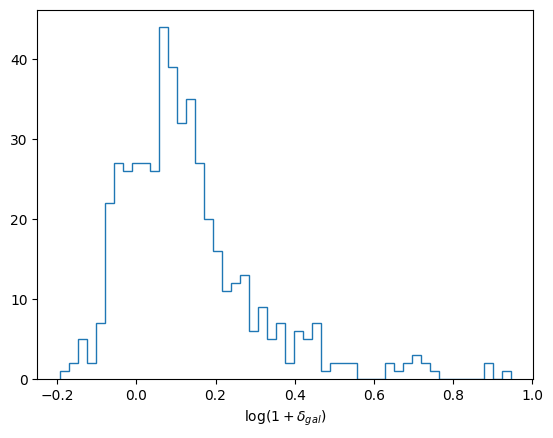

In [57]:
plt.hist(gals2["Dgal"],bins=50,histtype="step")
#plt.hist(pairss_good["Dgal"],bins=50,histtype="step")
#plt.hist(nonpair["Dgal"],bins=50,histtype="step")
plt.xlabel("log($1+\delta_{gal}$)")
plt.show()

### now plots for pair vs not pair

In [58]:
print(len(pairss_good),len(nonpair))

26 463


Text(0.5, 0, 'log($1+\\delta_{gal}$)')

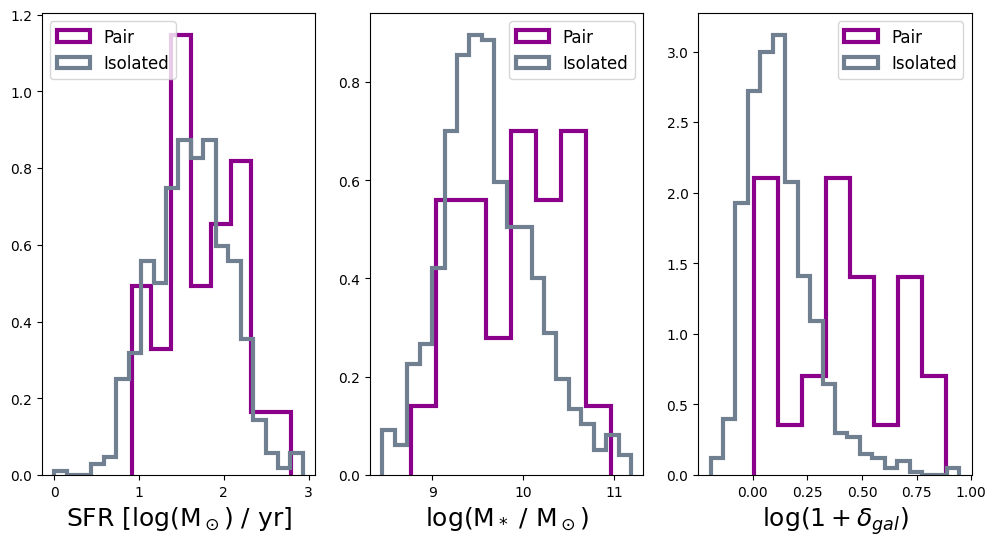

In [57]:
# hists 

# OFFICIAL VERSION NOW 
fig, axs = plt.subplots(1,3,figsize=(12,6))

axs[0].hist(pairss_good["SFR"],density=True,bins=8,linewidth=3,histtype="step",label="Pair",color="darkmagenta")
axs[0].hist(nonpair["SFR"],density=True,bins=20,linewidth=3,histtype="step",label="Isolated",color="slategrey")
axs[0].legend(loc="upper left",fontsize=12)
axs[0].set_xlabel("SFR [log(M$_\odot$) / yr]",fontsize=18)

axs[1].hist(pairss_good["M"],density=True,bins=8,linewidth=3,histtype="step",label="Pair",color="darkmagenta")
axs[1].hist(nonpair["M"],density=True,bins=20,linewidth=3,histtype="step",label="Isolated",color="slategrey")
axs[1].legend(loc="upper right",fontsize=12)
axs[1].set_xlabel("log(M$_*$ / M$_\odot$)",fontsize=18)

axs[2].hist(pairss_good["Dgal"],density=True,bins=8,linewidth=3,histtype="step",label="Pair",color="darkmagenta")
axs[2].hist(nonpair["Dgal"],density=True,bins=20,linewidth=3,histtype="step",label="Isolated",color="slategrey")
axs[2].legend(loc="upper right",fontsize=12)
axs[2].set_xlabel("log($1+\delta_{gal}$)",fontsize=18)
#plt.show()
#plt.savefig("pvsnpOFFICIAL.jpeg")

In [60]:
print(round(np.median(pairss_good["M"]),2),np.mean(pairss_good["M"]))
print(round(np.median(nonpair["M"]),2),np.mean(nonpair["M"]))

9.99 9.898106538461537
9.54 9.603860669546435


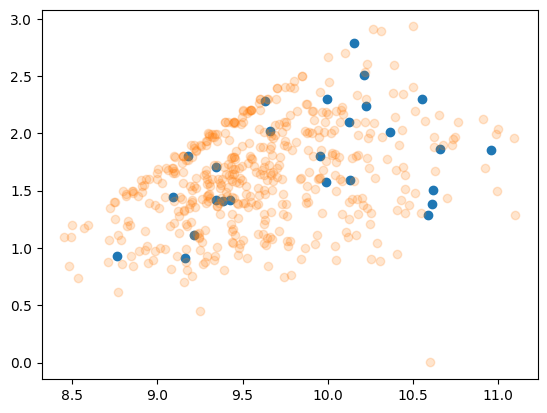

In [61]:
plt.scatter(pairss_good["M"],pairss_good["SFR"])
plt.scatter(nonpair["M"],nonpair["SFR"],alpha=0.2)
plt.show()

In [62]:
path = "/Users/finngiddings/Documents/699-1/Data/Overdensity/masterallz.COSMOS.mastermedVoronoi.specprobabilistic.overdens.100interations.fits"
file = fits.open(path)

In [117]:
# for offical
dgal2_pair = getDgal2(pairss_good["RA"],pairss_good["DEC"],pairss_good["z"],file)

In [118]:
dgal2_nonpair = getDgal2(nonpair["RA"],nonpair["DEC"],nonpair["z"],file)

In [119]:
file.close()

In [120]:
pairss_good["dgal2"] = dgal2_pair
nonpair["dgal2"] = dgal2_nonpair

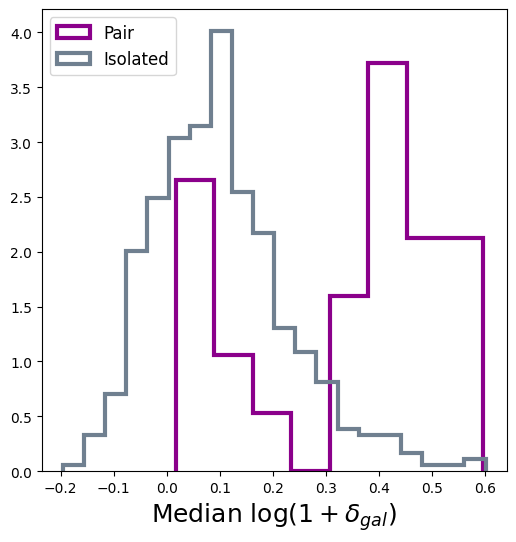

In [121]:
# OFFICIAL 
plt.figure(figsize=(6,6))
plt.hist(pairss_good["dgal2"],bins=8,histtype="step",density=True,linewidth=3,label="Pair",color="darkmagenta")
plt.hist(nonpair["dgal2"],bins=20,histtype="step",density=True,linewidth=3,label="Isolated",color="slategrey")
plt.legend(loc="upper left",fontsize=12)
plt.xlabel("Median log($1+\delta_{gal}$)",fontsize=18)
#plt.show()
plt.savefig("pvsnpdgalOFFICIAL.jpeg")

In [122]:
## quick look at higher mass galaxies.. which environments 

In [123]:
nonpair_highm = nonpair[nonpair["M"] > 10]
print(len(nonpair_highm))

98


In [124]:
pairss_highm = pairss_good[pairss_good["M"] > 10]
print(len(pairss_highm))

12


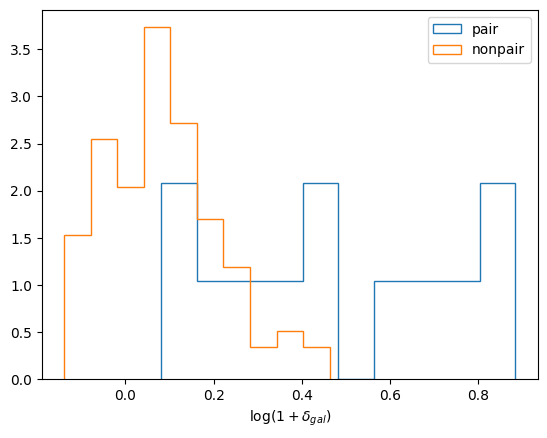

In [125]:
plt.hist(pairss_highm["Dgal"],histtype="step",label="pair",density=True)
plt.hist(nonpair_highm["Dgal"],histtype="step",label="nonpair",density=True)
plt.legend(loc="upper right")
plt.xlabel("log($1+\delta_{gal}$)")
plt.show()

In [126]:
pair_02 = pairss_good[pairss_good["Dgal"] < 0.2]
pair_04 = pairss_good[(pairss_good["Dgal"] > 0.2) & (pairss_good["Dgal"] < 0.4)]
pair_06 = pairss_good[(pairss_good["Dgal"] > 0.4) & (pairss_good["Dgal"] < 0.6)]
pair_08 = pairss_good[(pairss_good["Dgal"] > 0.6)] #& (pairss_good["Dgal"] < 0.8)]
#pair_1 = pairss_good[(pairss_good["Dgal"] > 0.8)]

In [127]:
print(len(pair_02),len(pair_04),len(pair_06),len(pair_08))#len(pair_1))

7 3 9 7


In [128]:
nonpair_02 = nonpair[nonpair["Dgal"] < 0.2]
nonpair_04 = nonpair[(nonpair["Dgal"] > 0.2) & (nonpair["Dgal"] < 0.4)]
nonpair_06 = nonpair[(nonpair["Dgal"] > 0.4) & (nonpair["Dgal"] < 0.6)]
nonpair_08 = nonpair[(nonpair["Dgal"] > 0.6)] #& (nonpair["Dgal"] < 0.8)]
#nonpair_1 = nonpair[(nonpair["Dgal"] > 0.8)]

In [129]:
print(len(nonpair_02),len(nonpair_04),len(nonpair_06),len(nonpair_08))#,len(nonpair_1))

367 75 14 7


In [130]:
fraction = [len(pair_02) / (len(pair_02)+len(nonpair_02))*100,
            len(pair_04) / (len(pair_04)+len(nonpair_04))*100,
            len(pair_06) / (len(pair_06)+len(nonpair_06))*100,
            len(pair_08) / (len(pair_08)+len(nonpair_08))*100]#,
            #len(pair_1) / (len(pair_1)+len(nonpair_1))*100]

In [131]:
dgal_meds = [np.median(pd.concat([pair_02,nonpair_02])["Dgal"]),
             np.median(pd.concat([pair_04,nonpair_04])["Dgal"]),
             np.median(pd.concat([pair_06,nonpair_06])["Dgal"]),
             np.median(pd.concat([pair_08,nonpair_08])["Dgal"])]#,
             #np.median(pd.concat([pair_1,nonpair_1])["Dgal"])]

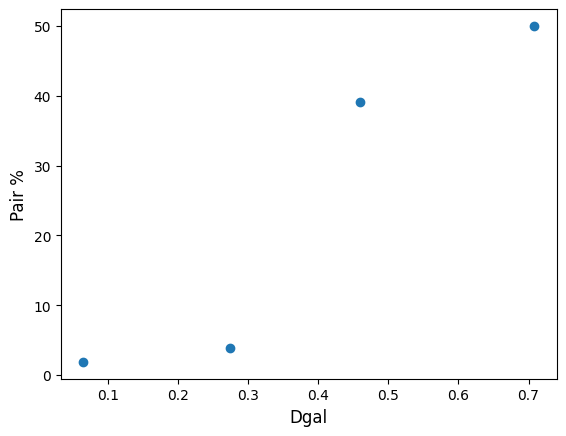

In [132]:
plt.scatter(dgal_meds,fraction)
plt.xlabel("Dgal",fontsize=12)
plt.ylabel("Pair %",fontsize=12)
plt.show()

In [133]:
pair_sfr_med = [np.median(pair_02["SFR"]),
                np.median(pair_04["SFR"]),
                np.median(pair_06["SFR"]),
                np.median(pair_08["SFR"])]#,
                #np.median(pair_1["SFR"])]



In [134]:
#scipy.stats.median_abs_deviation
pair_sfr_err = [sc.stats.median_abs_deviation(pair_02["SFR"])/sqrt(len(pair_02)-1),
                sc.stats.median_abs_deviation(pair_04["SFR"])/sqrt(len(pair_04)-1),
                sc.stats.median_abs_deviation(pair_06["SFR"])/sqrt(len(pair_06)-1),
                sc.stats.median_abs_deviation(pair_08["SFR"])/sqrt(len(pair_08)-1)]#,
                #sc.stats.median_abs_deviation(pair_1["SFR"])/sqrt(len(pair_1)-1)]

In [135]:
nonpair_sfr_med = [np.median(nonpair_02["SFR"]),
                np.median(nonpair_04["SFR"]),
                np.median(nonpair_06["SFR"]),
                np.median(nonpair_08["SFR"])]#,
                #np.median(nonpair_1["SFR"])]



In [136]:
nonpair_sfr_err = [sc.stats.median_abs_deviation(nonpair_02["SFR"])/sqrt(len(nonpair_02)-1),
                sc.stats.median_abs_deviation(nonpair_04["SFR"])/sqrt(len(nonpair_04)-1),
                sc.stats.median_abs_deviation(nonpair_06["SFR"])/sqrt(len(nonpair_06)-1),
                sc.stats.median_abs_deviation(nonpair_08["SFR"])/sqrt(len(nonpair_08)-1)]#,
                #sc.stats.median_abs_deviation(nonpair_1["SFR"])/sqrt(len(nonpair_1)-1)]

In [137]:
pair_dgal_med = [np.median(pair_02["Dgal"]),
                np.median(pair_04["Dgal"]),
                np.median(pair_06["Dgal"]),
                np.median(pair_08["Dgal"])]#,
                #np.median(pair_1["Dgal"])]

In [138]:
#scipy.stats.median_abs_deviation
pair_dgal_err = [sc.stats.median_abs_deviation(pair_02["Dgal"])/sqrt(len(pair_02)-1),
                sc.stats.median_abs_deviation(pair_04["Dgal"])/sqrt(len(pair_04)-1),
                sc.stats.median_abs_deviation(pair_06["Dgal"])/sqrt(len(pair_06)-1),
                sc.stats.median_abs_deviation(pair_08["Dgal"])/sqrt(len(pair_08)-1)]#,
                #sc.stats.median_abs_deviation(pair_1["Dgal"])/sqrt(len(pair_1)-1)]

In [139]:
nonpair_dgal_med = [np.median(nonpair_02["Dgal"]),
                np.median(nonpair_04["Dgal"]),
                np.median(nonpair_06["Dgal"]),
                np.median(nonpair_08["Dgal"])]#,
                #np.median(nonpair_1["Dgal"])]

In [140]:
nonpair_dgal_err = [sc.stats.median_abs_deviation(nonpair_02["Dgal"])/sqrt(len(nonpair_02)-1),
                sc.stats.median_abs_deviation(nonpair_04["Dgal"])/sqrt(len(nonpair_04)-1),
                sc.stats.median_abs_deviation(nonpair_06["Dgal"])/sqrt(len(nonpair_06)-1),
                sc.stats.median_abs_deviation(nonpair_08["Dgal"])/sqrt(len(nonpair_08)-1)]#,
                #sc.stats.median_abs_deviation(nonpair_1["Dgal"])/sqrt(len(nonpair_1)-1)]

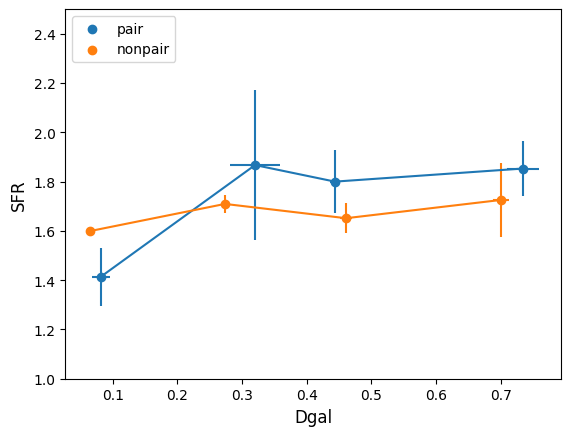

In [141]:
plt.scatter(pair_dgal_med,pair_sfr_med,label="pair")
plt.errorbar(pair_dgal_med,pair_sfr_med,yerr=pair_sfr_err,xerr=pair_dgal_err)
plt.scatter(nonpair_dgal_med,nonpair_sfr_med,label="nonpair")
plt.errorbar(nonpair_dgal_med,nonpair_sfr_med,yerr=nonpair_sfr_err,xerr=nonpair_dgal_err)
plt.xlabel("Dgal",fontsize=12)
plt.ylabel("SFR",fontsize=12)
plt.legend(loc="upper left")
plt.ylim(1,2.5)
plt.show()

In [142]:
sfr_enhance =  []
for x in range(len(pair_sfr_med)):
    print(pair_sfr_med[x],nonpair_sfr_med[x])
    sfr_enhance.append(pair_sfr_med[x]/nonpair_sfr_med[x])

1.41368 1.5993
1.86713 1.70939
1.79993 1.651415
1.85307 1.72552


In [143]:
## check this error 
sfr_enhance_err = []
dgal_meds_err2 = []
for x in range(len(pair_sfr_err)):
    sfr_enhance_err.append(pair_sfr_err[x]+nonpair_sfr_err[x])
    dgal_meds_err2.append(pair_dgal_err[x]+nonpair_dgal_err[x])

In [144]:
sfr_enhance_err2 = [sc.stats.median_abs_deviation(pd.concat([pair_02,nonpair_02])["SFR"])/sqrt(len(pd.concat([pair_02,nonpair_02]))-1),
                     sc.stats.median_abs_deviation(pd.concat([pair_04,nonpair_04])["SFR"])/sqrt(len(pd.concat([pair_04,nonpair_04]))-1),
                     sc.stats.median_abs_deviation(pd.concat([pair_06,nonpair_06])["SFR"])/sqrt(len(pd.concat([pair_06,nonpair_06]))-1),
                     sc.stats.median_abs_deviation(pd.concat([pair_08,nonpair_08])["SFR"])/sqrt(len(pd.concat([pair_08,nonpair_08]))-1)]#,
                     #sc.stats.median_abs_deviation(pd.concat([pair_1,nonpair_1])["SFR"])/sqrt(len(pd.concat([pair_1,nonpair_1]))-1)]

In [145]:
dgal_meds_err = [sc.stats.median_abs_deviation(pd.concat([pair_02,nonpair_02])["Dgal"])/sqrt(len(pd.concat([pair_02,nonpair_02]))-1),
             sc.stats.median_abs_deviation(pd.concat([pair_04,nonpair_04])["Dgal"])/sqrt(len(pd.concat([pair_04,nonpair_04]))-1),
             sc.stats.median_abs_deviation(pd.concat([pair_06,nonpair_06])["Dgal"])/sqrt(len(pd.concat([pair_06,nonpair_06]))-1),
             sc.stats.median_abs_deviation(pd.concat([pair_08,nonpair_08])["Dgal"])/sqrt(len(pd.concat([pair_08,nonpair_08]))-1)]#,
             #sc.stats.median_abs_deviation(pd.concat([pair_1,nonpair_1])["Dgal"])/sqrt(len(pd.concat([pair_1,nonpair_1]))-1)]

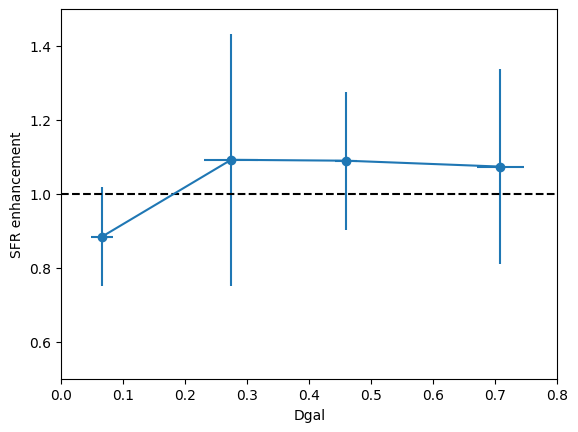

In [146]:
plt.scatter(dgal_meds,sfr_enhance)
plt.errorbar(dgal_meds,sfr_enhance,yerr=sfr_enhance_err,xerr=dgal_meds_err2)
plt.xlabel("Dgal")
plt.ylabel("SFR enhancement")
plt.plot(np.linspace(0,1,10),np.linspace(1,1,10),linestyle="--",color="black")
plt.xlim(0,0.8)
plt.ylim(0.5,1.5)
plt.show()

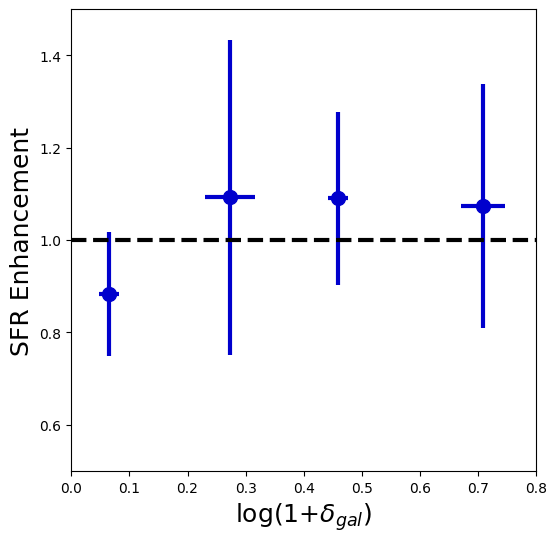

In [147]:
## OFFICIAL
plt.figure(figsize=(6,6))
plt.errorbar(dgal_meds,sfr_enhance,yerr=sfr_enhance_err,xerr=dgal_meds_err2,fmt="o",markersize=10,elinewidth=3,color="mediumblue")
plt.xlabel("log(1+$\delta_{gal}$)",fontsize=18)
plt.ylabel("SFR Enhancement",fontsize=18)
plt.plot(np.linspace(0,1,10),np.linspace(1,1,10),linestyle="--",color="black",linewidth=3)
plt.xlim(0,0.8)
plt.ylim(0.5,1.5)
#plt.show()
plt.savefig("sfrenchanceOFFICIAL.jpeg")

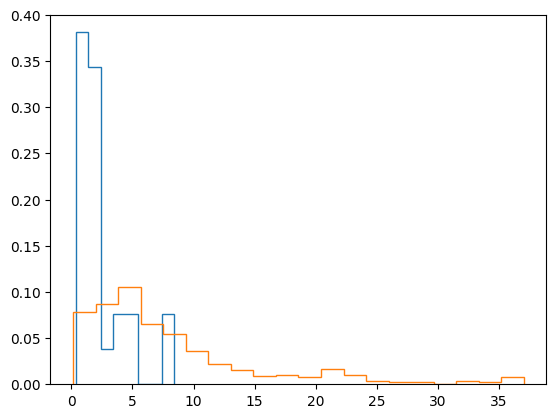

In [148]:
# anotha
plt.hist(pairss_good["Rnorm"],bins=8,histtype='step',density=True)
plt.hist(nonpair["Rnorm"],bins=20,histtype='step',density=True)
plt.show()

In [149]:
pair_lowr = pairss_good[pairss_good["Rnorm"] < 2.5]
pair_midr = pairss_good[(pairss_good["Rnorm"] > 2.5) & (pairss_good["Rnorm"] < 5)]
pair_middr = pairss_good[(pairss_good["Rnorm"] > 5) & (pairss_good["Rnorm"] < 7.5)]
pair_midddr = pairss_good[(pairss_good["Rnorm"] > 7.5) & (pairss_good["Rnorm"] < 10)]
pair_highr = pairss_good[pairss_good["Rnorm"] > 10]

print(len(pair_lowr),len(pair_midr),len(pair_middr),len(pair_midddr),len(pair_highr))

20 4 0 2 0


In [150]:
nonpair_lowr = nonpair[nonpair["Rnorm"] < 2.5]
nonpair_midr = nonpair[(nonpair["Rnorm"] > 2.5) & (nonpair["Rnorm"] < 5)]
nonpair_middr = nonpair[(nonpair["Rnorm"] > 5) & (nonpair["Rnorm"] < 7.5)]
nonpair_midddr = nonpair[(nonpair["Rnorm"] > 7.55) & (nonpair["Rnorm"] < 10)]
nonpair_highr = nonpair[nonpair["Rnorm"] > 10]

print(len(nonpair_lowr),len(nonpair_midr),len(nonpair_middr),len(nonpair_midddr),len(nonpair_highr))

84 120 83 61 115


In [151]:
count_np = [len(nonpair_lowr),len(nonpair_midr),len(nonpair_middr),len(nonpair_midddr),len(nonpair_highr)]
count_p = [len(pair_lowr),len(pair_midr),len(pair_middr),len(pair_midddr),len(pair_highr)]

In [152]:
frac_rnorm = [len(pair_lowr)/(len(nonpair_lowr)+len(pair_lowr)),
              len(pair_midr)/(len(nonpair_midr)+len(pair_midr)),
              len(pair_middr)/(len(nonpair_middr)+len(pair_middr)),
              len(pair_midddr)/(len(nonpair_midddr)+len(pair_midddr)),
              len(pair_highr)/(len(nonpair_highr)+len(pair_highr))]

In [153]:
frac_rnorm

[0.19230769230769232, 0.03225806451612903, 0.0, 0.031746031746031744, 0.0]

In [154]:
med_rnorms = [np.median(pd.concat([pair_lowr,nonpair_lowr])["Rnorm"]),
              np.median(pd.concat([pair_midr,nonpair_midr])["Rnorm"]),
              np.median(pd.concat([pair_middr,nonpair_middr])["Rnorm"]),
              np.median(pd.concat([pair_midddr,nonpair_midddr])["Rnorm"]),
              np.median(pd.concat([pair_highr,nonpair_highr])["Rnorm"])]

In [155]:
adjusts_x = [0.5,0.5,0.5,0.5,-1]
adjusts_y = [0,0,0,0.005,0.01]

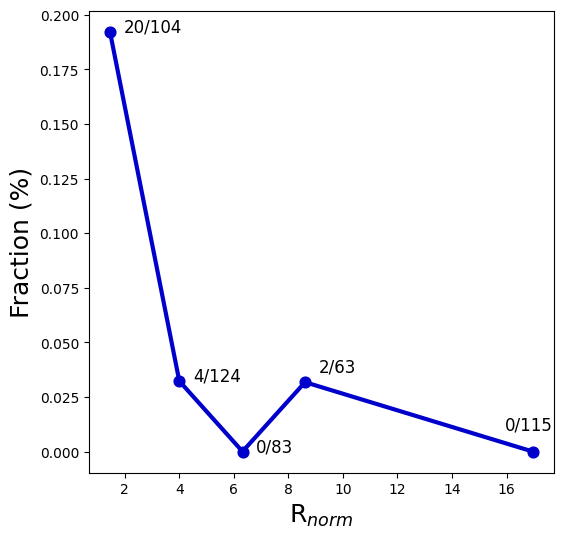

In [193]:
# official 
plt.figure(figsize=(6,6))
plt.scatter(med_rnorms,frac_rnorm,s=60,color="mediumblue")
plt.plot(med_rnorms,frac_rnorm,linewidth=3,color="mediumblue")
plt.xlabel("R$_{norm}$",fontsize=18)
plt.ylabel("Fraction (%)",fontsize=18)
# make text 
for x in range(5):
    plt.text(med_rnorms[x]+adjusts_x[x],frac_rnorm[x]+adjusts_y[x],str(count_p[x])+"/"+str(count_np[x]+count_p[x]),fontsize=12)
#plt.show()
plt.savefig("rnormpercOFFICIAL.jpeg")

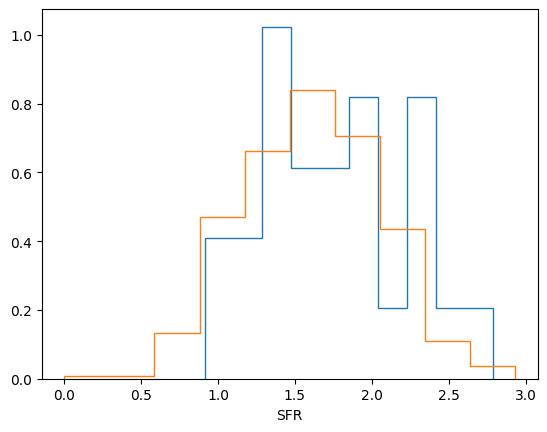

In [157]:
plt.hist(pairss_good["SFR"],histtype="step",density=True)
plt.hist(nonpair["SFR"],histtype="step",density=True)
plt.xlabel("SFR")
plt.show()

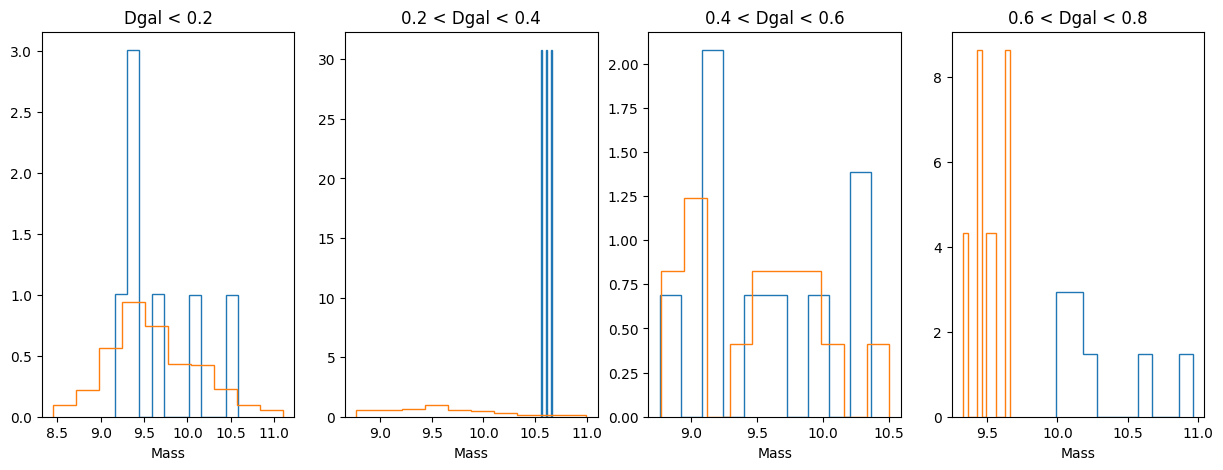

In [158]:
fig,axs = plt.subplots(1,4,figsize=(15,5))

axs[0].hist(pair_02["M"],histtype='step',density=True)
axs[0].hist(nonpair_02["M"],histtype='step',density=True)
axs[0].set_title("Dgal < 0.2")
axs[0].set_xlabel("Mass")

axs[1].hist(pair_04["M"],histtype='step',density=True)
axs[1].hist(nonpair_04["M"],histtype='step',density=True)
axs[1].set_title("0.2 < Dgal < 0.4")
axs[1].set_xlabel("Mass")

axs[2].hist(pair_06["M"],histtype='step',density=True)
axs[2].hist(nonpair_06["M"],histtype='step',density=True)
axs[2].set_title("0.4 < Dgal < 0.6")
axs[2].set_xlabel("Mass")

axs[3].hist(pair_08["M"],histtype='step',density=True)
axs[3].hist(nonpair_08["M"],histtype='step',density=True)
axs[3].set_title("0.6 < Dgal < 0.8")
axs[3].set_xlabel("Mass")

#axs[4].hist(pair_1["M"],histtype='step',density=True)
#axs[4].hist(nonpair_1["M"],histtype='step',density=True)
#axs[4].set_title("0.8 < Dgal")
#axs[4].set_xlabel("Mass")

plt.show()

In [159]:
pair_ssfr_med = [np.median(pair_02["sSFR"]),
                np.median(pair_04["sSFR"]),
                np.median(pair_06["sSFR"]),
                np.median(pair_08["sSFR"])]#,
                #np.median(pair_1["sSFR"])]



In [160]:
#scipy.stats.median_abs_deviation
pair_ssfr_err = [sc.stats.median_abs_deviation(pair_02["sSFR"])/sqrt(len(pair_02)-1),
                sc.stats.median_abs_deviation(pair_04["sSFR"])/sqrt(len(pair_04)-1),
                sc.stats.median_abs_deviation(pair_06["sSFR"])/sqrt(len(pair_06)-1),
                sc.stats.median_abs_deviation(pair_08["sSFR"])/sqrt(len(pair_08)-1)]#,
                #sc.stats.median_abs_deviation(pair_1["sSFR"])/sqrt(len(pair_1)-1)]

In [161]:
nonpair_ssfr_med = [np.median(nonpair_02["sSFR"]),
                np.median(nonpair_04["sSFR"]),
                np.median(nonpair_06["sSFR"]),
                np.median(nonpair_08["sSFR"])]#,
                #np.median(nonpair_1["sSFR"])]



In [162]:
nonpair_ssfr_err = [sc.stats.median_abs_deviation(nonpair_02["sSFR"])/sqrt(len(nonpair_02)-1),
                sc.stats.median_abs_deviation(nonpair_04["sSFR"])/sqrt(len(nonpair_04)-1),
                sc.stats.median_abs_deviation(nonpair_06["sSFR"])/sqrt(len(nonpair_06)-1),
                sc.stats.median_abs_deviation(nonpair_08["sSFR"])/sqrt(len(nonpair_08)-1)]#,
                #sc.stats.median_abs_deviation(nonpair_1["sSFR"])/sqrt(len(nonpair_1)-1)]

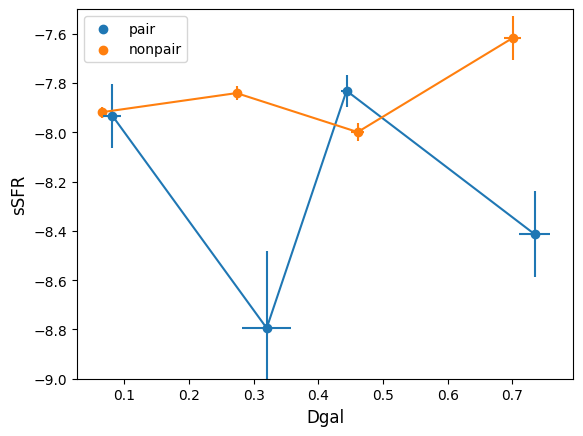

In [163]:
plt.scatter(pair_dgal_med,pair_ssfr_med,label="pair")
plt.errorbar(pair_dgal_med,pair_ssfr_med,yerr=pair_ssfr_err,xerr=pair_dgal_err)
plt.scatter(nonpair_dgal_med,nonpair_ssfr_med,label="nonpair")
plt.errorbar(nonpair_dgal_med,nonpair_ssfr_med,yerr=nonpair_ssfr_err,xerr=nonpair_dgal_err)
plt.xlabel("Dgal",fontsize=12)
plt.ylabel("sSFR",fontsize=12)
plt.legend(loc="upper left")
plt.ylim(-9,-7.5)
plt.show()

In [164]:
ssfr_enhance =  []
for x in range(len(pair_ssfr_med)):
    print(pair_ssfr_med[x],nonpair_ssfr_med[x])
    ssfr_enhance.append(1/(pair_ssfr_med[x]/nonpair_ssfr_med[x]))

-7.9327700000000005 -7.9183900000000005
-8.79457 -7.840770000000001
-7.831404999999999 -7.99901
-8.41309 -7.61748


In [165]:
ssfr_enhance_err =  []
for x in range(len(pair_ssfr_err)):
    #print(pair_ssfr_med[x],other_ssfr_med[x])
    ssfr_enhance_err.append((pair_ssfr_err[x]+nonpair_ssfr_err[x]))

In [166]:
ssfr_enhance_err2 = [sc.stats.median_abs_deviation(pd.concat([pair_02,nonpair_02])["sSFR"])/sqrt(len(pd.concat([pair_02,nonpair_02]))-1),
                     sc.stats.median_abs_deviation(pd.concat([pair_04,nonpair_04])["sSFR"])/sqrt(len(pd.concat([pair_04,nonpair_04]))-1),
                     sc.stats.median_abs_deviation(pd.concat([pair_06,nonpair_06])["sSFR"])/sqrt(len(pd.concat([pair_06,nonpair_06]))-1),
                     sc.stats.median_abs_deviation(pd.concat([pair_08,nonpair_08])["sSFR"])/sqrt(len(pd.concat([pair_08,nonpair_08]))-1)]#,
                     #sc.stats.median_abs_deviation(pd.concat([pair_1,nonpair_1])["sSFR"])/sqrt(len(pd.concat([pair_1,nonpair_1]))-1)]

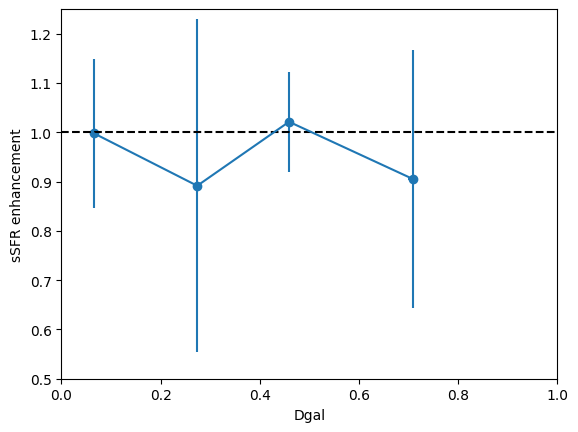

In [167]:
plt.scatter(dgal_meds,ssfr_enhance)
plt.errorbar(dgal_meds,ssfr_enhance,yerr=ssfr_enhance_err,xerr=dgal_meds_err)
plt.xlabel("Dgal")
plt.ylabel("sSFR enhancement")
plt.plot(np.linspace(0,1,10),np.linspace(1,1,10),linestyle="--",color="black")
plt.xlim(0,1)
plt.ylim(0.5,1.25)
plt.show()

## IRAC PAIR VS NOT PAIR 

In [168]:
# path and open the file 
path = "/Users/finngiddings/Documents/699-1/Data/COSMOS 2020/v2.0/COSMOS2020_CLASSIC_R1_v2.0.fits"
file = fits.open(path)

# get the data 
data = file[1].data
data_what = file[0].data
file.close()

In [169]:
ss_irac1 = []
ss_irac2 = []
for x in range(len(pairss_good)):
    if pairss_good.index[x] < 829:
        ss_irac1.append(data[pairss_good["ID"].iloc[x]-1][548])
        ss_irac2.append(data[pairss_good["ID"].iloc[x]-1][552])
        
print(len(ss_irac1))

26


In [170]:
pairss_good["IRAC1"] = ss_irac1
pairss_good["IRAC2"] = ss_irac2

In [171]:
np_irac1 = []
np_irac2 = []
for x in range(len(nonpair)):
    #if nonpair.index[x] >= 829:
    np_irac1.append(data[nonpair["ID"].iloc[x]-1][548])
    np_irac2.append(data[nonpair["ID"].iloc[x]-1][552])
        
print(len(np_irac1))

463


In [172]:
nonpair["IRAC1"] = np_irac1
nonpair["IRAC2"] = np_irac2

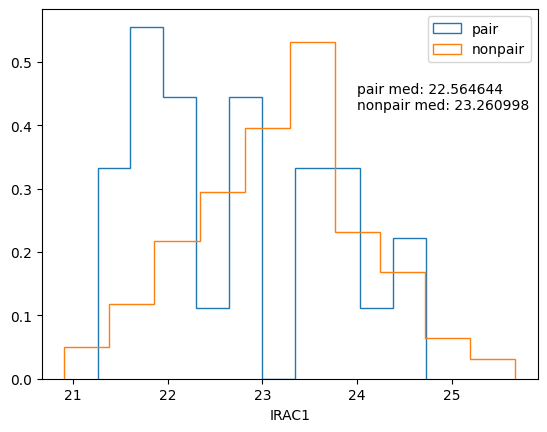

In [173]:
plt.hist(pairss_good["IRAC1"],density=True,label="pair",histtype="step")
plt.hist(nonpair["IRAC1"],density=True,label="nonpair",histtype="step")
plt.xlabel("IRAC1")
plt.text(24,0.45,"pair med: " + str(np.median(pairss_good["IRAC1"])))
plt.text(24,0.425,"nonpair med: " + str(np.median(nonpair["IRAC1"])))
plt.legend(loc="upper right")
plt.show()

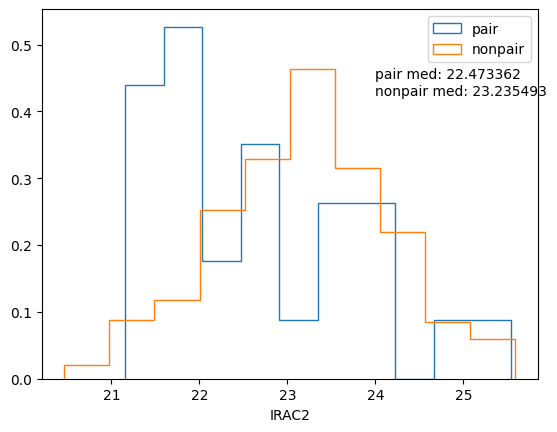

In [174]:
plt.hist(pairss_good["IRAC2"],density=True,label="pair",histtype="step")
plt.hist(nonpair["IRAC2"],density=True,label="nonpair",histtype="step")
plt.xlabel("IRAC2")
plt.text(24,0.45,"pair med: " + str(np.median(pairss_good["IRAC2"])))
plt.text(24,0.425,"nonpair med: " + str(np.median(nonpair["IRAC2"])))
plt.legend(loc="upper right")
plt.show()

## sky map

color code by struc 
- star vs circle for pair vs non 

also plot the struc 

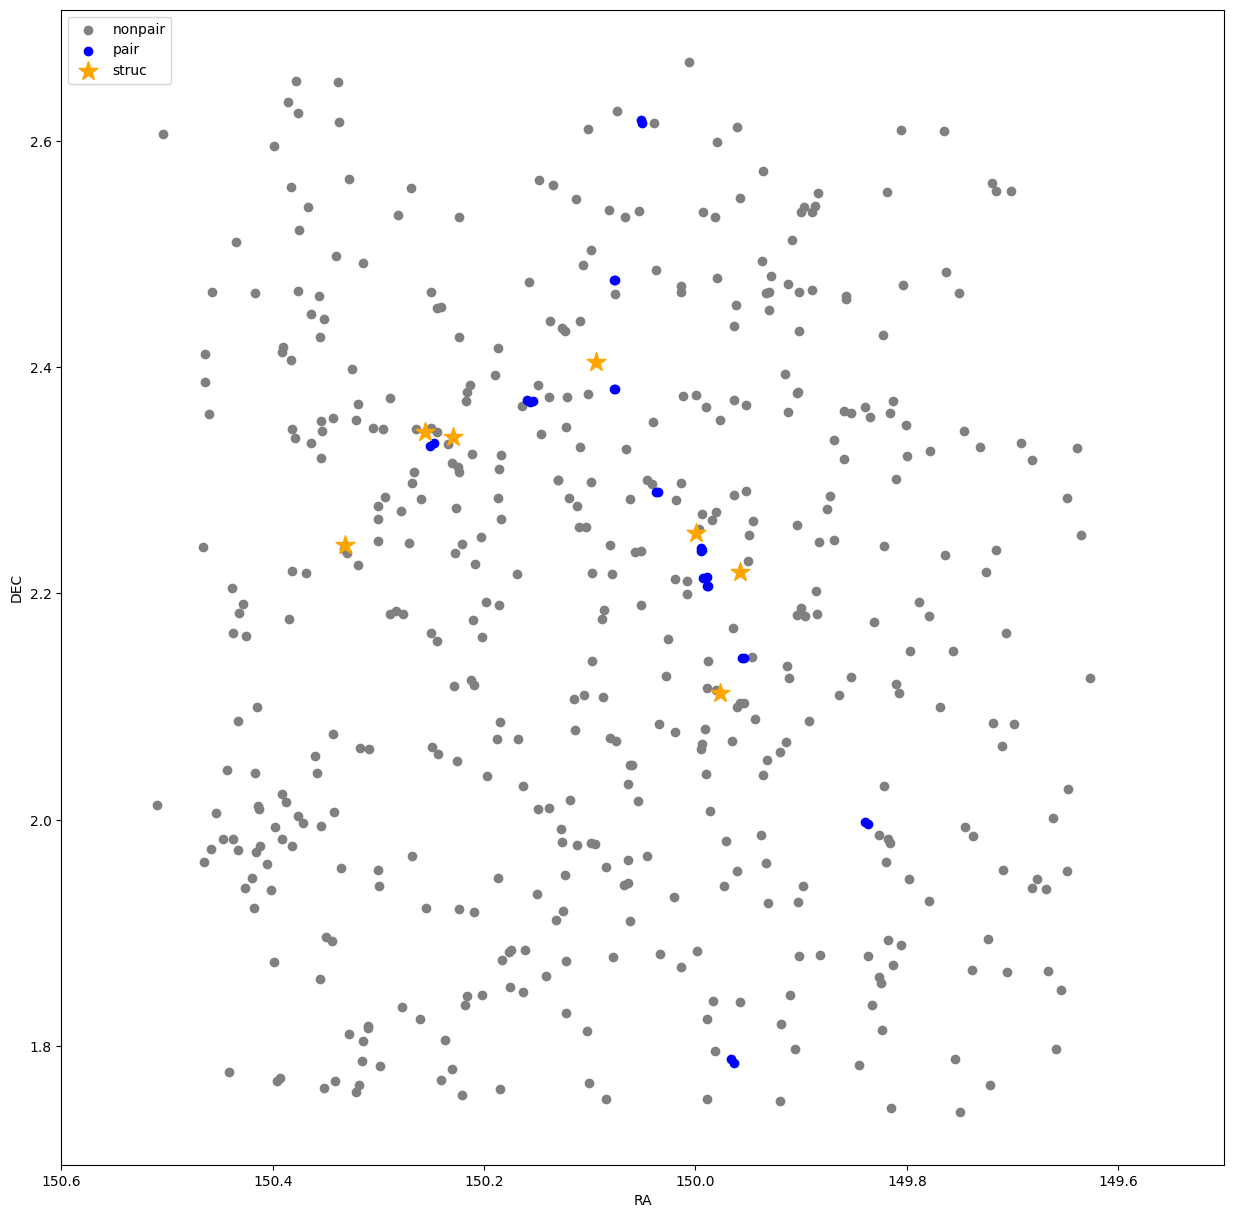

In [175]:
plt.figure(figsize=(15,15))
plt.scatter(nonpair["RA"],nonpair["DEC"],c="gray",label="nonpair")
plt.scatter(pairss_good["RA"],pairss_good["DEC"],c="blue",label="pair")
plt.scatter(ra_struc,dec_struc,c="orange",marker="*",s=200,label="struc")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.legend(loc="upper left")
plt.xlim(150.6,149.5)
plt.show()

In [176]:
struc_num = []

for x in range(len(pairss_good)):
    temp, temp2 = calcRnorm(pairss_good["RA"].iloc[x],pairss_good["DEC"].iloc[x],pairss_good["z"].iloc[x],ra_struc,dec_struc,z_peak,rex,rey,rez,cosmo)
    #r_norm.append(temp)
    struc_num.append(temp2)
    
    
print(len(struc_num))

26


In [177]:
pairss_good["struc"] = struc_num

In [178]:
struc_num = []

for x in range(len(nonpair)):
    temp, temp2 = calcRnorm(nonpair["RA"].iloc[x],nonpair["DEC"].iloc[x],nonpair["z"].iloc[x],ra_struc,dec_struc,z_peak,rex,rey,rez,cosmo)
    #r_norm.append(temp)
    struc_num.append(temp2)
    
    
print(len(struc_num))

463


In [179]:
nonpair["struc"] = struc_num

In [180]:
# turn into struc

pair1 = pairss_good[pairss_good["struc"] == 1]
pair2 = pairss_good[pairss_good["struc"] == 2]
pair3 = pairss_good[pairss_good["struc"] == 3]
pair4 = pairss_good[pairss_good["struc"] == 4]
pair5 = pairss_good[pairss_good["struc"] == 5]
pair6 = pairss_good[pairss_good["struc"] == 6]
pair7 = pairss_good[pairss_good["struc"] == 7]

In [181]:
# turn into struc

nonpair1 = nonpair[nonpair["struc"] == 1]
nonpair2 = nonpair[nonpair["struc"] == 2]
nonpair3 = nonpair[nonpair["struc"] == 3]
nonpair4 = nonpair[nonpair["struc"] == 4]
nonpair5 = nonpair[nonpair["struc"] == 5]
nonpair6 = nonpair[nonpair["struc"] == 6]
nonpair7 = nonpair[nonpair["struc"] == 7]

(2.1, 2.7)

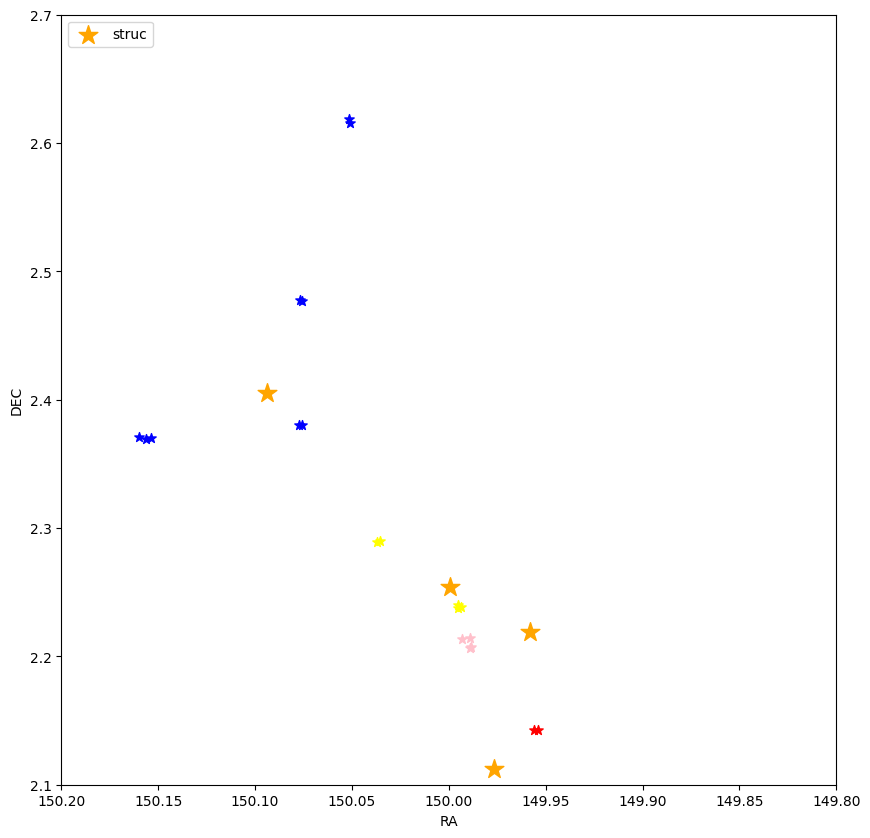

In [182]:
plt.figure(figsize=(10,10))
plt.scatter(pair1["RA"],pair1["DEC"],color="blue",marker="*",s=50)
#plt.scatter(nonpair1["RA"],nonpair1["DEC"],color="blue",label="S1",s=10)
plt.scatter(pair2["RA"],pair2["DEC"],color="red",marker="*",s=50)
#plt.scatter(nonpair2["RA"],nonpair2["DEC"],color="red",label="S2",s=10)
plt.scatter(pair3["RA"],pair3["DEC"],color="yellow",marker="*",s=50)
#plt.scatter(nonpair3["RA"],nonpair3["DEC"],color="yellow",label="S3",s=10)
plt.scatter(pair4["RA"],pair4["DEC"],color="green",marker="*",s=50)
#plt.scatter(nonpair4["RA"],nonpair4["DEC"],color="green",label="S4",s=10)
plt.scatter(pair5["RA"],pair5["DEC"],color="purple",marker="*",s=50)
#plt.scatter(nonpair5["RA"],nonpair5["DEC"],color="purple",label="S5",s=10)
plt.scatter(pair6["RA"],pair6["DEC"],color="orange",marker="*",s=50)
#plt.scatter(nonpair6["RA"],nonpair6["DEC"],color="orange",label="S6",s=10)
plt.scatter(pair7["RA"],pair7["DEC"],color="pink",marker="*",s=50)
#plt.scatter(nonpair7["RA"],nonpair7["DEC"],color="pink",label="S7",s=10)
plt.scatter(ra_struc,dec_struc,c="orange",marker="*",s=200,label="struc")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.legend(loc="upper left")
plt.xlim(150.2,149.8)
plt.ylim(2.1,2.7)

## some color color plots

do the NUV - r, r - J

In [183]:
pairss_good["NUVr"] = pairss_good["NUV"] - pairss_good["r"]

In [184]:
nonpair["NUVr"] = nonpair["NUV"] - nonpair["r"]

pairss_good["rJ"] = pairss_good["r"] - pairss_good["J"]
nonpair["rJ"] = nonpair["r"] - nonpair["J"]

In [185]:
pairss_good

,ID,RA,DEC,z,M,SFR,Dgal,Rnorm,NUV,u,r,J,sSFR,dgal2,IRAC1,IRAC2,struc,NUVr,rJ
35,381028,149.963318,1.785379,2.3980,9.34175,1.703620,0.103908,8.438077,-20.944,-21.514,-21.767,-21.644,-7.638130,0.129081,23.409565,23.453878,2,0.823,-0.123
38,384103,149.965960,1.788798,2.3873,9.16240,0.912620,0.006851,8.337901,-19.257,-20.284,-20.636,-20.416,-8.249780,0.031316,24.437756,24.671043,2,1.379,-0.220
224,600078,149.836594,1.996312,2.5496,9.63143,2.285140,0.047033,4.762230,-21.183,-21.819,-22.140,-22.507,-7.346290,0.044903,22.791355,22.712954,2,0.957,0.367
227,601602,149.839508,1.998243,2.5460,9.38620,1.407010,0.038479,4.669472,-21.118,-21.501,-21.584,-21.024,-7.979190,0.017369,23.517859,24.195160,2,0.466,-0.560
366,754726,149.953910,2.142624,2.4226,9.21264,1.114290,0.420315,0.975400,-20.164,-21.119,-21.104,-21.085,-8.098350,0.397473,23.988888,24.038116,2,0.940,-0.019
367,754815,149.955840,2.142755,2.4193,9.09270,1.440980,0.410103,0.948840,-20.168,-20.994,-21.226,-20.934,-7.651720,0.371280,24.095522,24.171331,2,1.058,-0.292
430,824437,149.988956,2.206343,2.4638,9.34645,1.413680,0.146612,2.268938,-19.522,-21.041,-21.366,-21.495,-7.932770,0.147666,24.012222,23.648621,7,1.844,0.129
432,827014,149.988346,2.207023,2.4598,10.55340,2.298650,0.235712,2.212265,-21.623,-22.993,-23.717,-23.975,-8.254750,0.183436,21.262106,21.157040,7,2.094,0.258
435,832715,149.992927,2.213561,2.4236,10.61450,1.379840,0.320166,2.392908,-20.284,-21.590,-22.680,-23.306,-9.234660,0.320166,21.966896,21.792702,7,2.396,0.626
438,834502,149.988856,2.214684,2.4262,10.66170,1.867130,0.374405,2.108890,-20.462,-22.267,-23.168,-23.606,-8.794570,0.361363,21.607420,21.502150,7,2.706,0.438


In [186]:
nonpair

,ID,RA,DEC,z,M,SFR,Dgal,Rnorm,NUV,u,r,J,sSFR,dgal2,IRAC1,IRAC2,struc,NUVr,rJ
0,335852,149.749588,1.741531,2.4074,9.33231,0.892688,0.007612,11.220750,-20.096,-21.369,-20.940,-21.331,-8.439622,0.003402,24.157324,23.782513,2,0.844,0.391
2,340242,149.814850,1.744979,2.3531,9.25402,1.891940,0.059990,10.298941,-20.391,-21.096,-21.641,-21.380,-7.362080,0.075569,23.554579,23.672415,2,1.250,-0.261
4,346841,149.920212,1.751179,2.3902,10.12810,1.249940,0.107208,9.417460,-21.381,-21.950,-22.445,-22.701,-8.878160,0.099922,22.570370,22.392775,2,1.064,0.256
5,347466,149.989334,1.752793,2.3707,9.96518,1.302420,0.053388,9.249980,-21.016,-22.248,-22.177,-22.167,-8.662760,0.054763,22.813374,22.909634,2,1.161,-0.010
6,348778,150.084290,1.752919,2.4778,10.21850,2.099290,0.077529,9.758057,-21.956,-22.763,-23.172,-23.631,-8.119210,0.077529,21.655293,21.524986,2,1.216,0.459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,1271811,150.074478,2.626190,2.5408,9.43478,1.714940,-0.052947,4.405510,-20.450,-21.653,-21.738,-21.807,-7.719840,-0.041770,23.547510,23.406189,1,1.288,0.069
824,1277921,150.385650,2.634293,2.3768,9.26190,1.424010,0.093113,9.442328,-20.369,-20.957,-21.399,-21.220,-7.837890,0.093113,23.896959,23.858898,4,1.030,-0.179
826,1297195,150.378420,2.653405,2.4758,8.98808,0.970041,0.159443,9.983608,-20.323,-21.066,-20.621,-20.264,-8.018039,0.163182,24.167683,24.903887,4,0.298,-0.357
827,1297272,150.338620,2.651640,2.5256,9.64518,2.299820,0.059931,9.609228,-21.308,-22.017,-22.408,-22.232,-7.345360,0.064889,22.698227,22.967571,4,1.100,-0.176


NameError: name 'line1x' is not defined

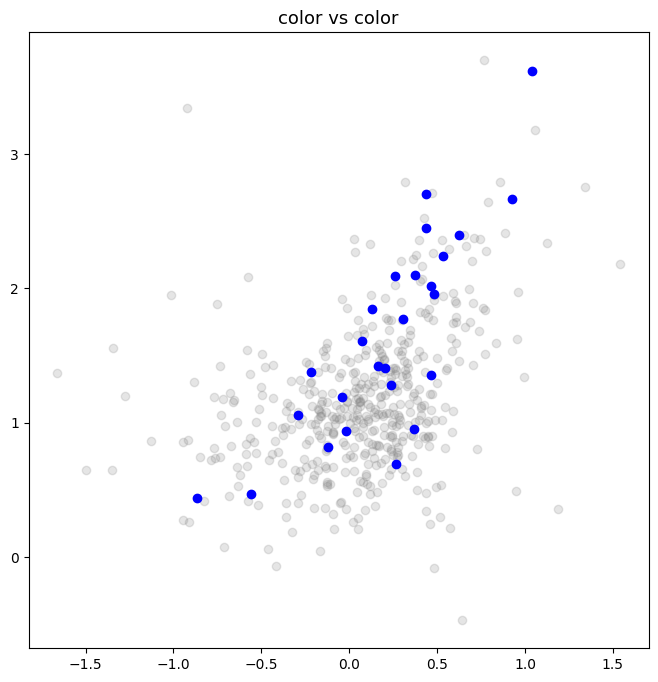

In [187]:


plt.figure(figsize=(8,8))
plt.title("color vs color", fontsize=13)
plt.scatter(nonpair["rJ"],nonpair["NUVr"],alpha=0.2,c="gray",label="other")
plt.scatter(pairss_good["rJ"],pairss_good["NUVr"],c="blue",label="pair")
plt.plot(line1x,line1y,c="black",linestyle="dashed")
plt.plot(line2x,line2y,c="black",linestyle="dashed")

plt.xlabel("r _ J ",fontsize=12)
plt.ylabel("NUV - r",fontsize=12)
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Galaxies with MNUV−Mr > 3(Mr−MJ)+1 and MNUV−Mr>3.1 are considered as quiescent.

In [190]:
line1x = np.linspace(-2.4,0.7,10)
line1x_test = np.linspace(-2.4,2,10)
line1y = np.linspace(3.1,3.1,10)

line2x = np.linspace(0.7,2.5,10)
line2x_test = np.linspace(-2,2.5,10)
line2y = []
for x in line2x:
    line2y.append(3*x +1)

In [191]:
#cmap = mpl.cm.plasma
#norm = mpl.colors.Normalize(vmin=np.min(pair["Rnorm"]), vmax=np.max(pair["Rnorm"]))

#plt.scatter(pair["r"],pair["ur"],c=pair["Rnorm"],cmap=cmap,label="pair")
#plt.colorbar(ScalarMappable(norm=norm, cmap=cmap),label='$R_{norm}$')

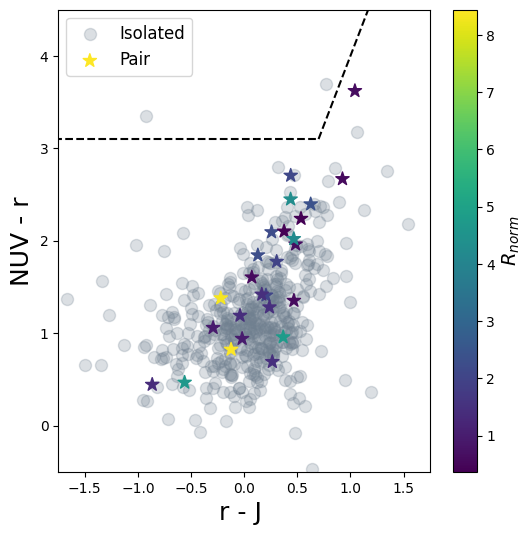

In [192]:
#OFFCIAL VERSION
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=np.min(pairss_good["Rnorm"]), vmax=np.max(pairss_good["Rnorm"]))

plt.figure(figsize=(6,6))
plt.scatter(nonpair["rJ"],nonpair["NUVr"],alpha=0.25,c="slategray",s=75,label="Isolated")
plt.scatter(pairss_good["rJ"],pairss_good["NUVr"],s=100,marker="*",c=pairss_good["Rnorm"],cmap=cmap,label="Pair")

ax=plt.gca()
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=cmap),ax=ax)
cbar.set_label('$R_{norm}$',fontsize=14)
#ax.tick_params(labelsize=20)
plt.plot(line1x,line1y,c="black",linestyle="dashed")
plt.plot(line2x,line2y,c="black",linestyle="dashed")

plt.xlabel("r - J ",fontsize=18)
plt.ylabel("NUV - r",fontsize=18)
plt.legend(loc="upper left",fontsize=12)
plt.xlim(-1.75,1.75)
plt.ylim(-0.5,4.5)
#plt.show()
plt.savefig("pvnpCCOFFICIAL.jpeg")

# PLOT FOR SFR MASS GRID!!!!!

gonna try this real quick as well 

In [1170]:
### TIME TO DO THE GRID !!! 
mass_sfr = np.zeros((6,6))
mass_sfr_pair = np.zeros((6,6))
print(mass_sfr)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [1171]:
# get correct mass bin
def massBin(mass):
    if mass > 10.5:
        return 5
    elif mass > 10:
        return 4
    elif mass > 9.5:
        return 3
    elif mass > 9:
        return 2
    elif mass > 8.5:
        return 1 
    else:
        return 0
    
# get correct sfr Bin
def sfrBin(sfr):
    if sfr > 2:
        return 0
    elif sfr > 1.5:
        return 1
    elif sfr > 1:
        return 2
    elif sfr > 0.5:
        return 3
    elif sfr > 0:
        return 4 
    else:
        return 5

In [1172]:
len(gals2)

489

In [1173]:
# put into grid 
# 2+, 1.5 2, 1.5 1, 1 0.5, 0.5 0, 0 less SFR
# 10.5 +, 10 10.5, 9.5 10, 9 9.5, 8.5 9, 8.5 low MASS

for x in range(len(gals2["M"])):
    sfrbin = sfrBin(gals2["SFR"].iloc[x])
    massbin = massBin(gals2["M"].iloc[x])
    
    mass_sfr[sfrbin][massbin]+=1

print(mass_sfr)
print(np.sum(mass_sfr))



massbin = []
sfrbin = []
for x in pairss_good["M"]:
    massbin.append(massBin(x))
for x in pairss_good["SFR"]:
    sfrbin.append(sfrBin(x))

for x in range(len(massbin)):   
    mass_sfr_pair[sfrbin[x]][massbin[x]]+=1   
    
    
print(mass_sfr_pair)
print(np.sum(mass_sfr_pair))

[[ 0.  0. 10. 53. 29.  8.]
 [ 0.  7. 88. 57. 27. 14.]
 [ 3. 24. 62. 37. 21.  6.]
 [ 1. 12. 18.  6.  4.  0.]
 [ 0.  0.  1.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.]]
489.0
[[0. 0. 0. 3. 5. 1.]
 [0. 0. 2. 2. 1. 3.]
 [0. 0. 5. 0. 0. 2.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
26.0


In [1174]:
comb = mass_sfr_pair / mass_sfr

/var/folders/r1/v6jyprzs36bct7d1x_kwtyfw0000gn/T/ipykernel_40073/1019154167.py:1: RuntimeWarning: invalid value encountered in divide
  comb = mass_sfr_pair / mass_sfr


In [1175]:
xticks = [0.5,1.5,2.5,3.5,4.5]
xlabels = [8.5,9,9.5,10,10.5]
yticks = [0.5,1.5,2.5,3.5,4.5]
ylabels = [2,1.5,1,0.5,0]

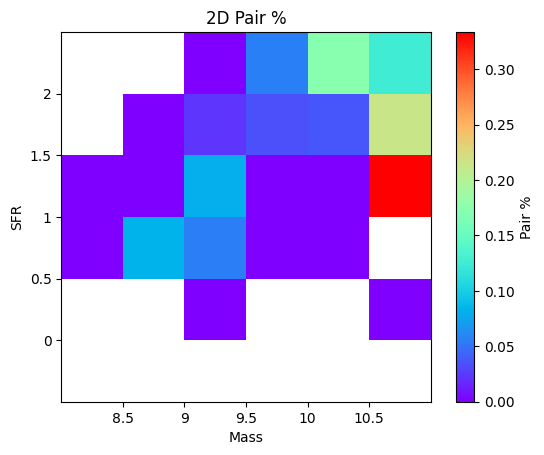

In [1177]:
plt.imshow(comb,cmap="rainbow",vmin=np.nanmin(comb),vmax=np.nanmax(comb))
plt.title("2D Pair %")
ax=plt.gca()
plt.colorbar(label="Pair %",ax=ax)
plt.xlabel("Mass")
plt.xticks(ticks = xticks, labels = xlabels)
plt.ylabel("SFR")
plt.yticks(ticks =yticks, labels = ylabels)
plt.show()

In [1178]:
# grid of sfr vs rnorm
dgal_rnorm = np.zeros((6,6))
dgal_rnorm_pair = np.zeros((6,6))
print(dgal_rnorm)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [1179]:
# get correct mass bin
def rnormBin(rnorm):
    if rnorm > 10:
        return 5
    elif rnorm > 8:
        return 4
    elif rnorm > 6:
        return 3
    elif rnorm > 4:
        return 2
    elif rnorm > 2:
        return 1 
    else:
        return 0
    
# get correct sfr Bin
def dgalBin(dgal):
    if dgal > 0.6:
        return 0
    elif dgal > 0.4:
        return 1
    elif dgal > 0.2:
        return 2
    elif dgal > 0.0:
        return 3
    elif dgal > -0.2:
        return 4 
    else:
        return 5

In [1180]:
# put into grid 
#
# 

for x in range(len(gals2["Dgal"])):
    dgalbin = dgalBin(gals2["Dgal"].iloc[x])
    rnormbin = rnormBin(gals2["Rnorm"].iloc[x])
    
    dgal_rnorm[dgalbin][rnormbin]+=1

print(dgal_rnorm)
print(np.sum(dgal_rnorm))



dgalbin = []
rnormbin = []
for x in pairss_good["Dgal"]:
    dgalbin.append(dgalBin(x))
for x in pairss_good["Rnorm"]:
    rnormbin.append(rnormBin(x))

for x in range(len(dgalbin)):   
    dgal_rnorm_pair[dgalbin[x]][rnormbin[x]]+=1   
    
    
print(dgal_rnorm_pair)
print(np.sum(dgal_rnorm_pair))

[[10.  2.  1.  0.  1.  0.]
 [17.  2.  0.  1.  1.  2.]
 [15. 16. 18.  5. 10. 14.]
 [32. 36. 55. 42. 26. 80.]
 [11. 25. 20. 15. 13. 19.]
 [ 0.  0.  0.  0.  0.  0.]]
489.0
[[6. 1. 0. 0. 0. 0.]
 [9. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0.]
 [0. 1. 4. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
26.0


In [1181]:
comb = dgal_rnorm_pair / dgal_rnorm

/var/folders/r1/v6jyprzs36bct7d1x_kwtyfw0000gn/T/ipykernel_40073/3439616716.py:1: RuntimeWarning: invalid value encountered in divide
  comb = dgal_rnorm_pair / dgal_rnorm


In [1182]:
xticks = [0.5,1.5,2.5,3.5,4.5]
xlabels = [2,4,6,8,10]
yticks = [0.5,1.5,2.5,3.5,4.5]
ylabels = [0.6,0.4,0.2,0.0,-0.2]

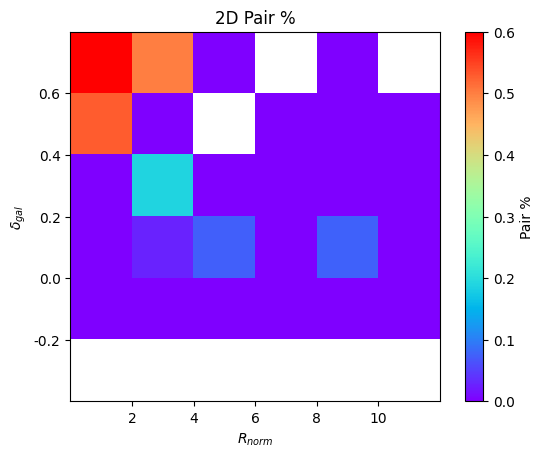

In [1183]:
plt.imshow(comb,cmap="rainbow",vmin=np.nanmin(comb),vmax=np.nanmax(comb))
plt.title("2D Pair %")
plt.colorbar(label="Pair %")
plt.xlabel("$R_{norm}$")
plt.xticks(ticks = xticks, labels = xlabels)
plt.ylabel("$\delta_{gal}$")
plt.yticks(ticks =yticks, labels = ylabels)
plt.show()

## compare removed to the nonpairs

In [64]:
### 
print(len(nonpair))
print(len(removes))
print(len(nonpair_pre))

463
247
795


In [65]:
len(dex)

247

In [66]:
np_remove = nonpair_pre[(nonpair_pre.index.isin(dex))|nonpair_pre["ID"].isin(pairidsp)]

In [67]:
nonpair_pre

,ID,RA,DEC,z,M,SFR,Dgal,Rnorm,NUV,u,r,J,sSFR
0,335852,149.749588,1.741531,2.4074,9.33231,0.892688,0.007612,11.220750,-20.096,-21.369,-20.940,-21.331,-8.439622
1,339984,149.773560,1.745023,2.5091,9.07761,1.628740,0.164052,10.948426,-20.665,-21.023,-21.064,-21.135,-7.448870
2,340242,149.814850,1.744979,2.3531,9.25402,1.891940,0.059990,10.298941,-20.391,-21.096,-21.641,-21.380,-7.362080
3,345894,149.976685,1.750714,2.4122,9.57869,1.222510,-0.041115,9.339165,-21.057,-22.099,-21.713,-21.771,-8.356180
4,346841,149.920212,1.751179,2.3902,10.12810,1.249940,0.107208,9.417460,-21.381,-21.950,-22.445,-22.701,-8.878160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,1277921,150.385650,2.634293,2.3768,9.26190,1.424010,0.093113,9.442328,-20.369,-20.957,-21.399,-21.220,-7.837890
825,1278201,150.025207,2.634014,2.4500,10.60870,1.793130,-0.068683,4.698767,-20.553,-22.120,-22.794,-23.584,-8.815570
826,1297195,150.378420,2.653405,2.4758,8.98808,0.970041,0.159443,9.983608,-20.323,-21.066,-20.621,-20.264,-8.018039
827,1297272,150.338620,2.651640,2.5256,9.64518,2.299820,0.059931,9.609228,-21.308,-22.017,-22.408,-22.232,-7.345360


In [68]:
nonpair

,ID,RA,DEC,z,M,SFR,Dgal,Rnorm,NUV,u,r,J,sSFR
0,335852,149.749588,1.741531,2.4074,9.33231,0.892688,0.007612,11.220750,-20.096,-21.369,-20.940,-21.331,-8.439622
2,340242,149.814850,1.744979,2.3531,9.25402,1.891940,0.059990,10.298941,-20.391,-21.096,-21.641,-21.380,-7.362080
4,346841,149.920212,1.751179,2.3902,10.12810,1.249940,0.107208,9.417460,-21.381,-21.950,-22.445,-22.701,-8.878160
5,347466,149.989334,1.752793,2.3707,9.96518,1.302420,0.053388,9.249980,-21.016,-22.248,-22.177,-22.167,-8.662760
6,348778,150.084290,1.752919,2.4778,10.21850,2.099290,0.077529,9.758057,-21.956,-22.763,-23.172,-23.631,-8.119210
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,1271811,150.074478,2.626190,2.5408,9.43478,1.714940,-0.052947,4.405510,-20.450,-21.653,-21.738,-21.807,-7.719840
824,1277921,150.385650,2.634293,2.3768,9.26190,1.424010,0.093113,9.442328,-20.369,-20.957,-21.399,-21.220,-7.837890
826,1297195,150.378420,2.653405,2.4758,8.98808,0.970041,0.159443,9.983608,-20.323,-21.066,-20.621,-20.264,-8.018039
827,1297272,150.338620,2.651640,2.5256,9.64518,2.299820,0.059931,9.609228,-21.308,-22.017,-22.408,-22.232,-7.345360


In [69]:
np_remove

,ID,RA,DEC,z,M,SFR,Dgal,Rnorm,NUV,u,r,J,sSFR
1,339984,149.773560,1.745023,2.5091,9.07761,1.628740,0.164052,10.948426,-20.665,-21.023,-21.064,-21.135,-7.448870
3,345894,149.976685,1.750714,2.4122,9.57869,1.222510,-0.041115,9.339165,-21.057,-22.099,-21.713,-21.771,-8.356180
7,350333,149.826004,1.755764,2.4636,8.95006,1.599890,0.140357,10.049766,-20.564,-20.843,-21.057,-20.643,-7.350170
9,351711,150.338623,1.757228,2.3662,9.99415,1.839340,-0.003138,36.565440,-20.260,-21.411,-22.298,-22.543,-8.154810
13,358135,150.122880,1.762887,2.5446,8.57297,0.970246,-0.081423,9.921055,-20.387,-20.446,-20.331,-20.358,-7.602724
...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,1245790,149.892960,2.601778,2.4100,10.91250,1.960280,-0.029197,5.501646,-21.278,-22.814,-23.503,-24.447,-8.952220
810,1247013,150.084549,2.603374,2.3879,9.18743,1.547470,-0.069798,3.878543,-20.536,-20.953,-21.227,-21.232,-7.639960
820,1264324,150.141312,2.620333,2.4809,9.46986,1.478330,0.191953,4.349164,-20.102,-20.935,-21.491,-21.552,-7.991530
823,1273873,150.128530,2.629675,2.5153,9.65321,1.108410,0.072974,4.499604,-20.609,-21.267,-21.421,-21.660,-8.544800


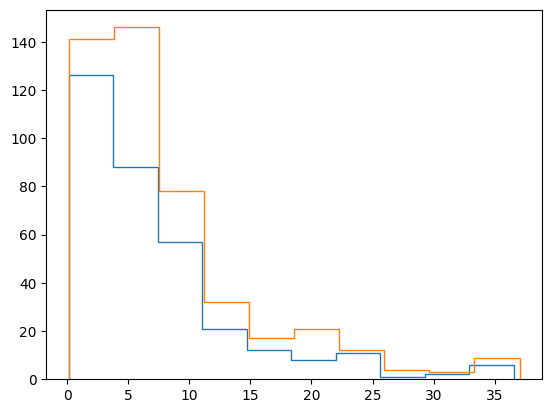

In [70]:
plt.hist(np_remove["Rnorm"],histtype='step')
plt.hist(nonpair["Rnorm"],histtype='step')
plt.show()

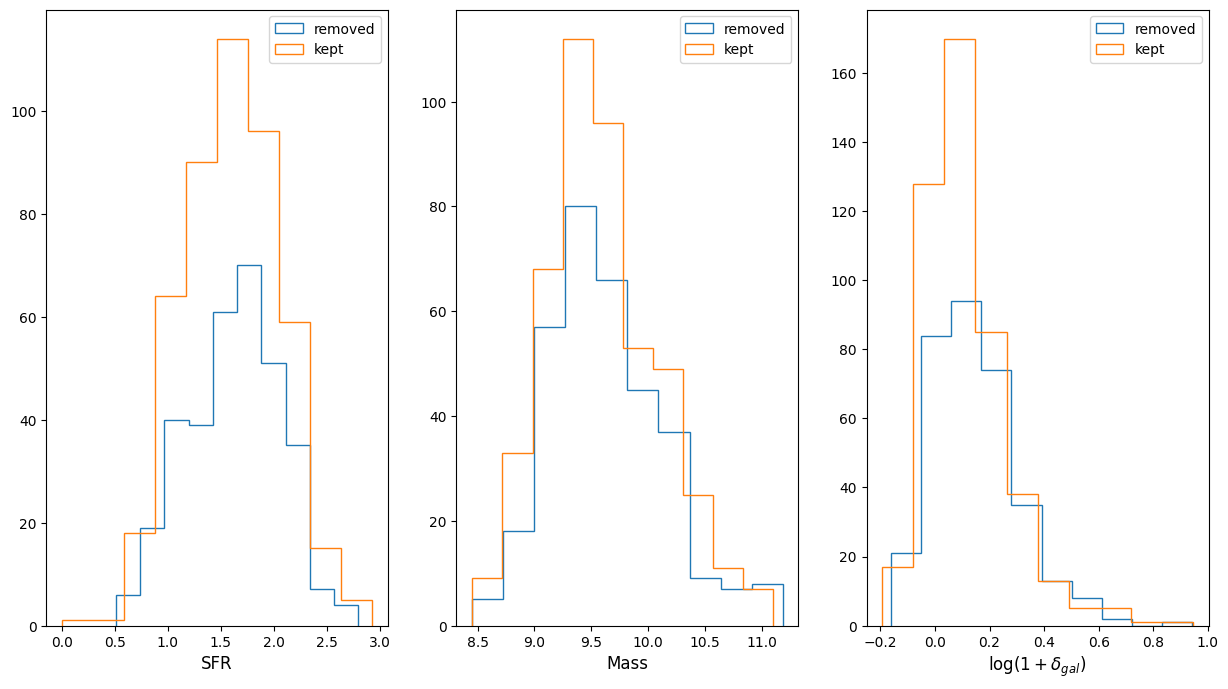

In [96]:
# hists 
fig, axs = plt.subplots(1,3,figsize=(15,8))

axs[0].hist(np_remove["SFR"],histtype="step",label="removed")
axs[0].hist(nonpair["SFR"],histtype="step",label="kept")
axs[0].legend(loc="upper right")
axs[0].set_xlabel("SFR",fontsize=12)

axs[1].hist(np_remove["M"],histtype="step",label="removed")
axs[1].hist(nonpair["M"],histtype="step",label="kept")
axs[1].legend(loc="upper right")
axs[1].set_xlabel("Mass",fontsize=12)

axs[2].hist(np_remove["Dgal"],histtype="step",label="removed")
axs[2].hist(nonpair["Dgal"],histtype="step",label="kept")
axs[2].legend(loc="upper right")
axs[2].set_xlabel("log($1+\delta_{gal}$)",fontsize=12)
plt.show()

In [97]:
from scipy.stats import ks_2samp
from astropy.table import Table

In [98]:
# write some functions 

# NOTE NEED TO MANUALLY CHANGE CONSTANT (for now) --> still 0.05 sig so good
def critVal(n1,n2):
    const = 1.36
    return const * sqrt((n1+n2)/(n1*n2))

def ksTest(d1,d2):
    temp = ks_2samp(d1,d2, alternative='two-sided')
    return temp[0],temp[1]

def getKS(data):
    ks = []
    p = []
    cv = []
    for x in data:
        
        ks_stat, pval = ksTest(x[0],x[1])
        cval = critVal(len(x[0]),len(x[1]))
        ks.append(ks_stat)
        p.append(pval)
        cv.append(cval)
        
    return ks, p , cv

In [99]:
ks_data = [[np_remove["z"],nonpair["z"]],[np_remove["M"],nonpair["M"]],[np_remove["Dgal"],nonpair["Dgal"]],
          [np_remove["SFR"],nonpair["SFR"]],[np_remove["Rnorm"],nonpair["Rnorm"]]]

In [103]:
ks_2samp(nonpair["Dgal"],np_remove["Dgal"], alternative='two-sided')

KstestResult(statistic=0.13710348955216112, pvalue=0.0012206559199099745, statistic_location=0.16968603, statistic_sign=1)

In [104]:
n1 = len(nonpair["Dgal"])
n2 = len(np_remove["Dgal"])

In [105]:
print(n1,n2)

463 332


In [109]:
1.95 * sqrt((n1+n2)/(n1*n2))

0.14023571668292498

In [110]:
ks_2samp(nonpair["Dgal"],pairss_good["Dgal"], alternative='two-sided')

KstestResult(statistic=0.6102342581824224, pvalue=2.781710942178392e-09, statistic_location=0.31845045, statistic_sign=1)

In [111]:
ks_2samp(pairss_good["Dgal"],np_remove["Dgal"], alternative='two-sided')

KstestResult(statistic=0.5755329008341057, pvalue=4.700755199398922e-08, statistic_location=0.37253967, statistic_sign=-1)

In [100]:
ks, p, cv = getKS(ks_data)

In [101]:
t = Table()
t['Param'] = ["z","mass","dgal","sfr","rnorm"]
t["KS Stat"] = ks
t["crit val "] = cv
t["p value "] = p
t["sig level"] = [0.05,0.05,0.05,0.05,0.05]

In [102]:
t.pprint_all()

Param       KS Stat            crit val              p value        sig level
----- ------------------- ------------------- --------------------- ---------
    z 0.10132972494730542 0.09780542291732204   0.03451604817640041      0.05
 mass 0.03792708631502251 0.09780542291732204    0.9303902219689604      0.05
 dgal 0.13710348955216112 0.09780542291732204 0.0012206559199099745      0.05
  sfr  0.0537679877176091 0.09780542291732204      0.60592559482933      0.05
rnorm 0.10936402196258034 0.09780542291732204  0.017779132801593468      0.05


## replot other vs pair 

use nonpair_pre

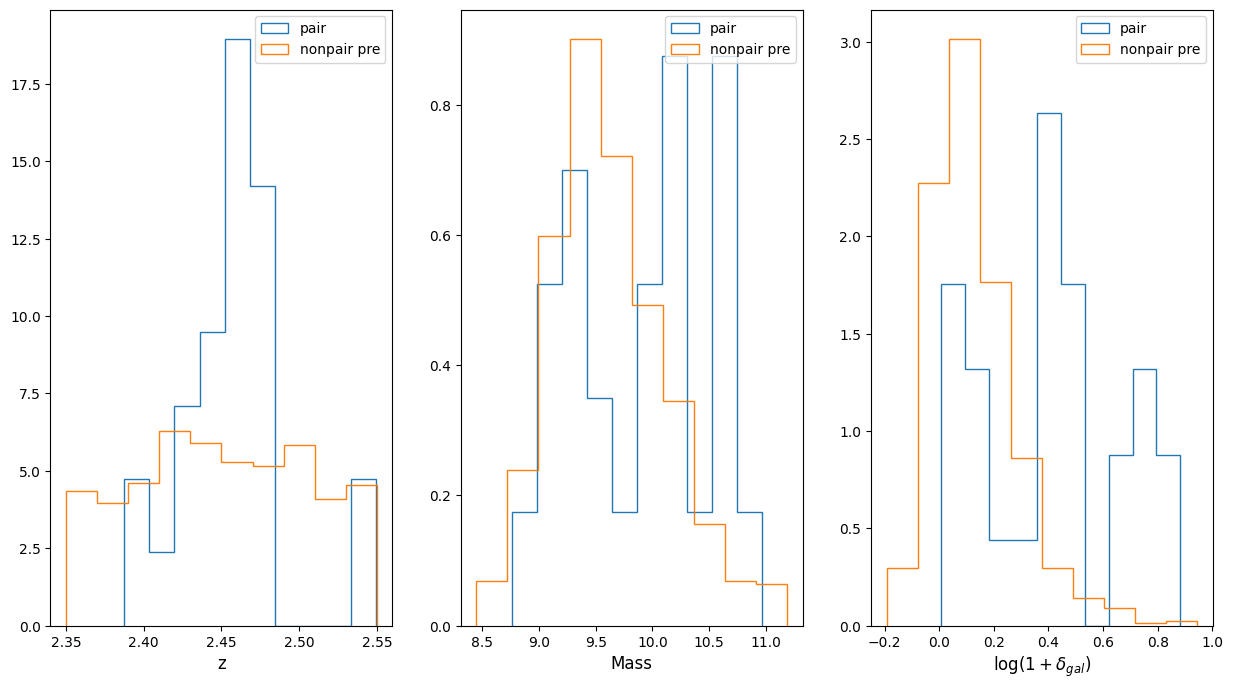

In [694]:
# hists 
fig, axs = plt.subplots(1,3,figsize=(15,8))

axs[0].hist(pairss_good["z"],histtype="step",density=True,label="pair")
axs[0].hist(nonpair_pre["z"],histtype="step",density=True,label="nonpair pre")
axs[0].legend(loc="upper right")
axs[0].set_xlabel("z",fontsize=12)

axs[1].hist(pairss_good["M"],histtype="step",density=True,label="pair")
axs[1].hist(nonpair_pre["M"],histtype="step",density=True,label="nonpair pre")
axs[1].legend(loc="upper right")
axs[1].set_xlabel("Mass",fontsize=12)

axs[2].hist(pairss_good["Dgal"],histtype="step",density=True,label="pair")
axs[2].hist(nonpair_pre["Dgal"],histtype="step",density=True,label="nonpair pre")
axs[2].legend(loc="upper right")
axs[2].set_xlabel("log($1+\delta_{gal}$)",fontsize=12)
plt.show()

(array([0.00429062, 0.01287187, 0.14159055, 0.46767787, 0.60926841,
        0.85812453, 0.73798709, 0.44622475, 0.09868432, 0.03432498]),
 array([3.27082000e-04, 2.93492374e-01, 5.86657666e-01, 8.79822957e-01,
        1.17298825e+00, 1.46615354e+00, 1.75931883e+00, 2.05248412e+00,
        2.34564942e+00, 2.63881471e+00, 2.93198000e+00]),
 [<matplotlib.patches.Polygon at 0x7fc375681900>])

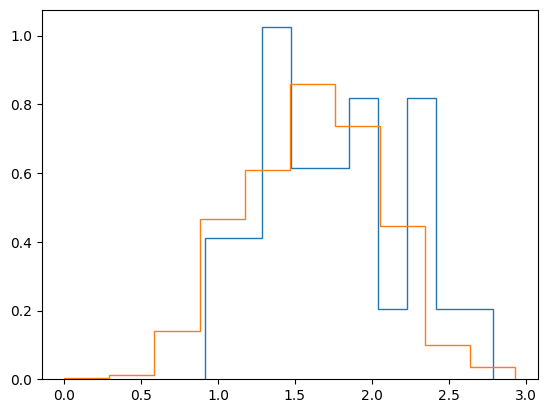

In [776]:
plt.hist(pairss_good["SFR"],histtype="step",density=True,label="pair")
plt.hist(nonpair_pre["SFR"],histtype="step",density=True,label="nonpair pre")

## major vs minor mergers 

for only the spec spec ones 

In [1187]:
len(pairidss_dub)

19

In [1188]:
bad_pair

[506812, 508214, 547299, 548174, 880255, 882963, 1116047, 1117098]

In [1189]:
pairss_dub_corr = []
for x in pairidss_dub:
    if x[0] in bad_pair and x[1] in bad_pair:
        continue
    else:
        pairss_dub_corr.append(x)
        
print(len(pairss_dub_corr))

15


In [1190]:
for x in pairss_dub_corr:
    print(x)
    
# ONE 3 WAY SYSTEM AND ONE WITH TWO POSSIBLE 

[381028, 384103]
[600078, 601602]
[754726, 754815]
[824437, 827014]
[832715, 834502]
[861246, 863839]
[861246, 861620]
[861620, 863839]
[917014, 917244]
[960782, 963687]
[1004089, 1004790]
[1004089, 1006557]
[1017359, 1017620]
[1116891, 1119250]
[1260645, 1264273]


In [1207]:
# get masses 
masses = []
sfrs = []
for x in pairss_dub_corr:
    temp = [0,0]
    temp2 = [0,0]
    for y in range(len(pairss_good)):
        if x[0] == pairss_good["ID"].iloc[y]:
            temp[0] = pairss_good["M"].iloc[y]
            temp2[0] = pairss_good["SFR"].iloc[y]
        if x[1] == pairss_good["ID"].iloc[y]:
            temp[1] = pairss_good["M"].iloc[y]
            temp2[1] = pairss_good["SFR"].iloc[y]
    masses.append(temp)
    sfrs.append(temp2)
print(np.shape(masses))

(15, 2)


In [1208]:
pair_sing1 = []
pair_sing2 = []
for x in pairss_dub_corr:
    pair_sing1.append(x[0])
    pair_sing2.append(x[1])
    
m_sing1 = []
m_sing2 = []
for x in masses:
    m_sing1.append(x[0])
    m_sing2.append(x[1])
    
sfr_1 = []
sfr_2 = []
for x in sfrs:
    sfr_1.append(x[0])
    sfr_2.append(x[1])

In [1209]:
## get a mass ratio, always more massive to less massive
def mRatio(m1,m2):
    if m1 > m2:
        return 10**(m1-m2)
    else:
        return 10**(m2-m1)

In [1210]:
pairtog = pd.DataFrame(data=[pair_sing1,m_sing1,sfr_1,pair_sing2,m_sing2,sfr_2]).T

In [1211]:
pairtog.columns =["ID1","M1","SFR1","ID2","M2","SFR2"]

In [1212]:
pairtog

,ID1,M1,SFR1,ID2,M2,SFR2
0,381028.0,9.34175,1.70362,384103.0,9.16240,0.912620
1,600078.0,9.63143,2.28514,601602.0,9.38620,1.407010
2,754726.0,9.21264,1.11429,754815.0,9.09270,1.440980
3,824437.0,9.34645,1.41368,827014.0,10.55340,2.298650
4,832715.0,10.61450,1.37984,834502.0,10.66170,1.867130
5,861246.0,10.96170,1.85307,863839.0,9.99361,2.300490
6,861246.0,10.96170,1.85307,861620.0,10.12400,2.099050
7,861620.0,10.12400,2.09905,863839.0,9.99361,2.300490
8,917014.0,9.99140,1.57831,917244.0,10.22250,2.237740
9,960782.0,10.12890,1.58933,963687.0,10.62030,1.504380


In [1213]:
ratios = []
for x in range(len(pairtog)):
    ratios.append(mRatio(pairtog["M1"].iloc[x],pairtog["M2"].iloc[x]))

In [1214]:
pairtog["mratio"]=ratios

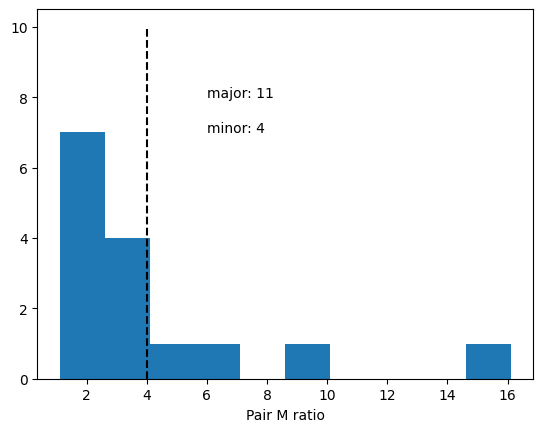

In [1215]:
plt.hist(pairtog["mratio"])
plt.xlabel("Pair M ratio")
plt.vlines(4,0,10,color="blacK",linestyle="--")
plt.text(6,8,"major: " + str(len(pairtog[pairtog["mratio"]<4])))
plt.text(6,7,"minor: " + str(len(pairtog[pairtog["mratio"]>4])))
plt.show()

In [1216]:
majors = pairtog[pairtog["mratio"]<4]
minors = pairtog[pairtog["mratio"]>4]

(array([1., 0., 0., 2., 0., 0., 2., 0., 1., 2.]),
 array([0.930345 , 1.0673595, 1.204374 , 1.3413885, 1.478403 , 1.6154175,
        1.752432 , 1.8894465, 2.026461 , 2.1634755, 2.30049  ]),
 <BarContainer object of 10 artists>)

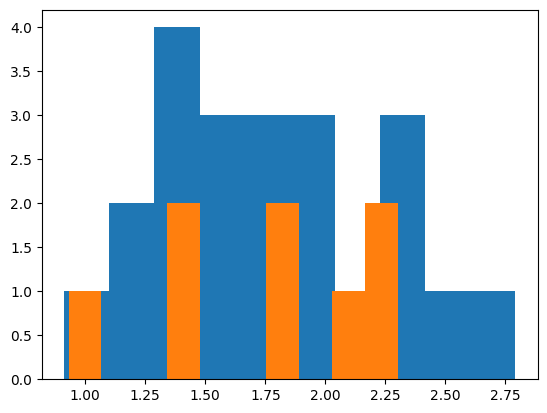

In [1222]:
plt.hist(np.concatenate([majors["SFR1"],majors["SFR2"]]))
plt.hist(np.concatenate([minors["SFR1"],minors["SFR2"]]))

In [708]:
pairtog # one with two has one major and one minor... the 3 way one major 2 minors.. but major is with the two lowest mass ones.. so most massive bringin in 2???

# 3 of the 4 minors come from the multis!!!

,ID1,M1,ID2,M2,mratio
0,381028.0,9.34175,384103.0,9.16240,1.511298
1,600078.0,9.63143,601602.0,9.38620,1.758855
2,754726.0,9.21264,754815.0,9.09270,1.318075
3,824437.0,9.34645,827014.0,10.55340,16.104602
4,832715.0,10.61450,834502.0,10.66170,1.114808
5,861246.0,10.96170,863839.0,9.99361,9.291589
6,861246.0,10.96170,861620.0,10.12400,6.881768
7,861620.0,10.12400,863839.0,9.99361,1.350175
8,917014.0,9.99140,917244.0,10.22250,1.702550
9,960782.0,10.12890,963687.0,10.62030,3.100273


# double checking the values I have 

z, mass and delta gal....

In [709]:
# first for mass and z use Ben catalog 

In [710]:
len(gals)

829

In [711]:
# get IDs stuff

file = open("/Users/finngiddings/Documents/699-1/Data/Master COSMOS/master_specz_COSMOS_BF_v2.cat","r")
string = file.read()
lst = string.splitlines()
file.close()


In [712]:
## checking time
confirm = 0 
for x in range(len(gals2)):
    for y in lst:
        temp = y.split()
        if gals2["ID"].iloc[x] == int(temp[0]):
            if gals2["z"].iloc[x] == float(temp[11]):
                if gals2["M"].iloc[x] == float(temp[15]):
                    confirm+=1
                    break
            
            
print(confirm)

489


In [713]:
cosmo

LambdaCDM(H0=70.0 km / (Mpc s), Om0=0.27, Ode0=0.73, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)

In [714]:
def checkDgal(ra,dec,z,dgal,struc_num):
    # nums from ogla paper
    z_peak = [2.468,2.426,2.444,2.469,2.507,2.492,2.423]
    rex = [3.37,2.31,1.94,2.77,1.05,0.88,1.22]
    rey = [4.07,3.25,1.82,2.12,1.27,1.05,0.90]
    rez = [7.76,5.18,6.15,6.00,4.07,5.83,2.71]
    ra_struc = [150.0937,149.9765,149.9996,150.2556,150.2293, 150.3316,149.9581]
    dec_struc = [2.4049,2.1124,2.2537, 2.3423,2.3381,2.2427,2.2187]
    
    cosmo = LambdaCDM(H0=70, Om0=0.27, Ode0=0.73)
    
    # get file
    path = "/Users/finngiddings/Documents/699-1/Data/Overdensity/masterallz.COSMOS.mastermedVoronoi.specprobabilistic.overdens.100interations.fits"
    file = fits.open(path)
    
    # check structure # 
    struc_alg = findStruc(ra,dec,z,z_peak,ra_struc,dec_struc,cosmo)[0]
    #print(struc_alg)
    if struc_alg != struc_num-1:
        print("bad struc")
        return
   # print(struc_num, " confirmed")
    
    # find hdu # and print
    hdu_id, ra_pix, dec_pix = findPoint(ra,dec,z,file)
    z_mid = np.mean([file[hdu_id].header[20], file[hdu_id].header[19]])
    #print(hdu_id, z, z_mid, str(abs(z-z_mid)))
    
    # find point for struc and plot
    ra_pixs,dec_pixs = mapPoint(ra_struc[struc_num-1],dec_struc[struc_num-1],file[hdu_id].header[15],file[hdu_id].header[16],file[hdu_id].header[13],file[hdu_id].header[14],
                    file[hdu_id].header[17],file[hdu_id].header[18])
    img = file[hdu_id].data
    dgalPlotter(ra_pix,dec_pix,ra_pixs,dec_pixs,img)
    
    # see what dgal value we get
    #print(file[hdu_id].data[int(ra_pix)][int(dec_pix)],dgal) 
    print(getDens2(ra,dec,z,file), " original")
    print("vary cell by 1")
    print(file[hdu_id].data[int(dec_pix+1)][int(ra_pix)])
    print(file[hdu_id].data[int(dec_pix-1)][int(ra_pix)])
    print(file[hdu_id].data[int(dec_pix)][int(ra_pix+1)])
    print(file[hdu_id].data[int(dec_pix)][int(ra_pix-1)])
    print(file[hdu_id].data[int(dec_pix+1)][int(ra_pix-1)])
    print(file[hdu_id].data[int(dec_pix+1)][int(ra_pix+1)])
    print(file[hdu_id].data[int(dec_pix-1)][int(ra_pix-1)])
    print(file[hdu_id].data[int(dec_pix-1)][int(ra_pix+1)])
    print("vary slice by one")
    print(file[hdu_id-1].data[int(dec_pix)][int(ra_pix)])
    print(file[hdu_id+1].data[int(dec_pix)][int(ra_pix)])
    
    print("center is ", str(file[hdu_id].header[13]), " ",str(file[hdu_id].header[14]))
    print("gal is ", str(ra), " ", str(dec))
    print("struc is ", str(ra_struc[struc_num-1]), " ", str(dec_struc[struc_num-1]))
    print("-------- \n")
    
    file.close()
    
    return

def dgalPlotter(ra_pix,dec_pix,ra_pixs,dec_pixs,img):
    cmap = mpl.cm.viridis
    norm = mpl.colors.Normalize(vmin=np.min(img), vmax=np.max(img))
    
    
    plt.imshow(img,origin="lower")
    plt.scatter(ra_pix,dec_pix,label="gal")
    plt.scatter(ra_pixs,dec_pixs,label="struc")
    plt.scatter(file[hdu_id].header[15],file[hdu_id].header[16],label="center")
    plt.legend(loc="upper left")
    
    ax=plt.gca()
    plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax)
    
    plt.show()
    return 

In [715]:
## get struc #s
r_norm = []
struc_num = []

for x in range(len(gals2)):
    temp, temp2 = calcRnorm(gals2["RA"].iloc[x],gals2["DEC"].iloc[x],gals2["z"].iloc[x],ra_struc,dec_struc,z_peak,rex,rey,rez,cosmo)
    r_norm.append(temp)
    struc_num.append(temp2)
    
    
print(len(r_norm))

489


In [716]:
gals2

,ID,RA,DEC,z,M,SFR,Dgal,Rnorm,sig,NUV,u,r,J,sSFR
0,335852,149.749588,1.741531,2.4074,9.33231,0.892688,0.007612,11.220750,0.238882,-20.096,-21.369,-20.940,-21.331,-8.439622
2,340242,149.814850,1.744979,2.3531,9.25402,1.891940,0.059990,10.298941,0.550793,-20.391,-21.096,-21.641,-21.380,-7.362080
4,346841,149.920212,1.751179,2.3902,10.12810,1.249940,0.107208,9.417460,0.813821,-21.381,-21.950,-22.445,-22.701,-8.878160
5,347466,149.989334,1.752793,2.3707,9.96518,1.302420,0.053388,9.249980,0.511556,-21.016,-22.248,-22.177,-22.167,-8.662760
6,348778,150.084290,1.752919,2.4778,10.21850,2.099290,0.077529,9.758057,0.572011,-21.956,-22.763,-23.172,-23.631,-8.119210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,1017620,150.075760,2.380647,2.4673,10.36580,2.012340,0.443656,0.593826,2.440770,-21.925,-22.829,-23.277,-23.745,-8.353460
740,1116891,150.076960,2.477341,2.4719,9.66330,2.015960,0.459693,1.464248,2.494588,-20.661,-21.625,-22.080,-22.246,-7.647340
745,1119250,150.075717,2.477135,2.4720,9.17775,1.799930,0.459693,1.466032,2.494588,-20.948,-21.456,-21.638,-21.903,-7.377820
816,1260645,150.050810,2.615739,2.4830,10.58860,1.286070,0.103673,4.242173,0.728526,-20.835,-22.051,-22.855,-23.322,-9.302530


In [717]:
gals2.insert(8,"Rnorm2",r_norm)
gals2.insert(9,"struc",struc_num)

In [718]:
gals2

,ID,RA,DEC,z,M,SFR,Dgal,Rnorm,Rnorm2,struc,sig,NUV,u,r,J,sSFR
0,335852,149.749588,1.741531,2.4074,9.33231,0.892688,0.007612,11.220750,11.220750,2,0.238882,-20.096,-21.369,-20.940,-21.331,-8.439622
2,340242,149.814850,1.744979,2.3531,9.25402,1.891940,0.059990,10.298941,10.298941,2,0.550793,-20.391,-21.096,-21.641,-21.380,-7.362080
4,346841,149.920212,1.751179,2.3902,10.12810,1.249940,0.107208,9.417460,9.417460,2,0.813821,-21.381,-21.950,-22.445,-22.701,-8.878160
5,347466,149.989334,1.752793,2.3707,9.96518,1.302420,0.053388,9.249980,9.249980,2,0.511556,-21.016,-22.248,-22.177,-22.167,-8.662760
6,348778,150.084290,1.752919,2.4778,10.21850,2.099290,0.077529,9.758057,9.758057,2,0.572011,-21.956,-22.763,-23.172,-23.631,-8.119210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,1017620,150.075760,2.380647,2.4673,10.36580,2.012340,0.443656,0.593826,0.593826,1,2.440770,-21.925,-22.829,-23.277,-23.745,-8.353460
740,1116891,150.076960,2.477341,2.4719,9.66330,2.015960,0.459693,1.464248,1.464248,1,2.494588,-20.661,-21.625,-22.080,-22.246,-7.647340
745,1119250,150.075717,2.477135,2.4720,9.17775,1.799930,0.459693,1.466032,1.466032,1,2.494588,-20.948,-21.456,-21.638,-21.903,-7.377820
816,1260645,150.050810,2.615739,2.4830,10.58860,1.286070,0.103673,4.242173,4.242173,1,0.728526,-20.835,-22.051,-22.855,-23.322,-9.302530


In [719]:
## check the first 20 or so 
y = 100
for x in range(20):
    #print(gals2["Rnorm"].iloc[x+y])
    #checkDgal(gals2["RA"].iloc[x+y],gals2["DEC"].iloc[x+y],gals2["z"].iloc[x+y],gals2["Dgal"].iloc[x+y],gals2["struc"].iloc[x+y])
    break

    
    

## look at IRAC cut of 24 again and see what mass dist looks like

also make sure all pairs are still around 

In [720]:
nonpair

,ID,RA,DEC,z,M,SFR,Dgal,Rnorm,sig,NUV,u,r,J,sSFR,IRAC1,IRAC2,struc,NUVr,rJ
0,335852,149.749588,1.741531,2.4074,9.33231,0.892688,0.007612,11.220750,0.238882,-20.096,-21.369,-20.940,-21.331,-8.439622,24.157324,23.782513,2,0.844,0.391
2,340242,149.814850,1.744979,2.3531,9.25402,1.891940,0.059990,10.298941,0.550793,-20.391,-21.096,-21.641,-21.380,-7.362080,23.554579,23.672415,2,1.250,-0.261
4,346841,149.920212,1.751179,2.3902,10.12810,1.249940,0.107208,9.417460,0.813821,-21.381,-21.950,-22.445,-22.701,-8.878160,22.570370,22.392775,2,1.064,0.256
5,347466,149.989334,1.752793,2.3707,9.96518,1.302420,0.053388,9.249980,0.511556,-21.016,-22.248,-22.177,-22.167,-8.662760,22.813374,22.909634,2,1.161,-0.010
6,348778,150.084290,1.752919,2.4778,10.21850,2.099290,0.077529,9.758057,0.572011,-21.956,-22.763,-23.172,-23.631,-8.119210,21.655293,21.524986,2,1.216,0.459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,1271811,150.074478,2.626190,2.5408,9.43478,1.714940,-0.052947,4.405510,-0.113646,-20.450,-21.653,-21.738,-21.807,-7.719840,23.547510,23.406189,1,1.288,0.069
824,1277921,150.385650,2.634293,2.3768,9.26190,1.424010,0.093113,9.442328,0.692652,-20.369,-20.957,-21.399,-21.220,-7.837890,23.896959,23.858898,4,1.030,-0.179
826,1297195,150.378420,2.653405,2.4758,8.98808,0.970041,0.159443,9.983608,0.975798,-20.323,-21.066,-20.621,-20.264,-8.018039,24.167683,24.903887,4,0.298,-0.357
827,1297272,150.338620,2.651640,2.5256,9.64518,2.299820,0.059931,9.609228,0.480850,-21.308,-22.017,-22.408,-22.232,-7.345360,22.698227,22.967571,4,1.100,-0.176


In [722]:
nonpair_24 = nonpair[(nonpair["IRAC1"] < 24) & (nonpair["IRAC2"] < 24)]
pair_24 = pairss_good[(pairss_good["IRAC1"] < 24) & (pairss_good["IRAC2"] < 24)]

In [724]:
print(len(nonpair_24), len(pair_24))

364 20


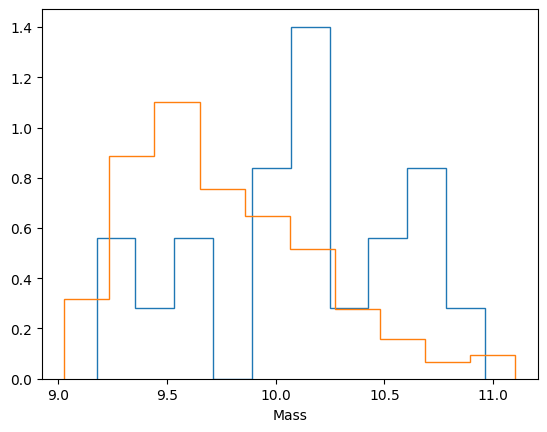

In [725]:
plt.hist(pair_24["M"],histtype='step',density=True,label="pair")
plt.hist(nonpair_24["M"],histtype="step",density=True,label="nonpair")
plt.xlabel("Mass")
plt.show()

## dgal over mulitple pixels 

so all within like 500 kpc or 1 Mpc

so get central pixel 
- then get radius pixels up and down 
- then something to get diagonal pixels.... 


scales with my cosmo
- 8.407 kpc/" at 2.35
- 8.342 kpc/" at 2.45 --> use this 
- 8.274 kpc/" at 2.55

from random dgal slice...
- -0.00248069842656 DEGREES / PIXEL                                 
-  0.00248070 DEGREES / PIXEL   


from that we have about 74 kpc/pix which in turn means r = 7 pix roughly 

so use old overdensity to map to point and then just grab square and median from that 
- double check visiualy to make sure... 


not sure how close stuff is to the edge tho... 



In [115]:
##grab overdensity functions

# from 1 - overdense cat 
def mapPoint(ra_act,dec_act,ra_pix,dec_pix,ra_cent,dec_cent,ra_corr,dec_corr):
    ra_new = round(ra_pix - (ra_cent - ra_act) / ra_corr,0)
    dec_new = round(dec_pix - (dec_cent - dec_act) / dec_corr,0)
    # CHANGED FOR NEGATIVES NOW
    return ra_new, dec_new


def findPoint(ra,dec,z,file):
    # set high number for z diff to start
    best_diff = 10 
    # what HDU should we use 
    hdu_id = 0
    
    # find z_mid closest to z actual 
    for x in range(184,266):
        z_mid = np.mean([file[x].header[20], file[x].header[19]])
        #print(type(z_mid))
        #print(type(z))
        if abs(z_mid - z) < best_diff:
            best_diff = abs(z_mid - z)
            hdu_id = x 
            #print(hdu_id, best_diff)
    
    #print(hdu_id)
    ra_pix, dec_pix = mapPoint(ra,dec,file[hdu_id].header[15],file[hdu_id].header[16],file[hdu_id].header[13],file[hdu_id].header[14],
                    file[hdu_id].header[17],file[hdu_id].header[18])
    return hdu_id, ra_pix, dec_pix


    
def getDens3(ra,dec,z,file):
    x, ra_pix, dec_pix = findPoint(ra,dec,z,file)
    #print(x,ra_pix,dec_pix)
    if ra_pix >= np.shape(file[int(x)])[0] or dec_pix >= np.shape(file[int(x)])[1]:
        return -99
    elif ra_pix < 0 or dec_pix < 0:
        return -99 
    else:
        rad_ra,rad_dec = getR(file[int(x)].header[17],file[int(x)].header[18])
        #print(rad_ra,rad_dec,x,ra_pix,dec_pix)
        # new function to perform array manipulation
        dgal_grid = getArray(file[int(x)].data[int(dec_pix-rad_dec):int(dec_pix+rad_dec)+1],ra_pix,rad_ra)
        return np.median(dgal_grid),x # get meidan instead
                                                           
        
# to do quick array manipulation
def getArray(arr, center,adjust):
    new_arr = []
    for x in arr:
        new_arr.append(x[int(center-adjust):int(center+adjust)+1])
    #print(np.shape(new_arr))
    return new_arr

# get num of pixels to adjuts                                                     
def getR(ra_scale,dec_scale):
    kpc_scale = 8.342 # kpc / "
    
    # do dah math
    ra_adj = abs(ra_scale) * 3600 * kpc_scale
    dec_adj = dec_scale * 3600 * kpc_scale
    
    # return how many pix
    return int(round(500 / ra_adj,0)), int(round(500 / dec_adj,0))
    # set at 500 kpc for now.... 

In [116]:
def getDgal2(ra,dec,z,file):
    dgal2 = []
    for x in range(len(ra)):
        temp,temp2 = getDens3(ra.iloc[x],dec.iloc[x],z.iloc[x],file)
        dgal2.append(temp)
        
    return dgal2

In [831]:
path = "/Users/finngiddings/Documents/699-1/Data/Overdensity/masterallz.COSMOS.mastermedVoronoi.specprobabilistic.overdens.100interations.fits"
file = fits.open(path)

In [823]:

dgal2 = getDgal2(gals2["RA"],gals2["DEC"],gals2["z"],file)

In [824]:
file.close()

In [825]:
len(dgal2)

489

In [826]:
gals2["dgal2"] = dgal2

In [827]:
gals2["dgal2"]

0      0.003402
2      0.075569
4      0.099922
5      0.054763
6      0.077529
         ...   
661    0.481146
740    0.392243
745    0.392243
816    0.080437
819    0.088415
Name: dgal2, Length: 489, dtype: float32

In [828]:
gals2

,ID,RA,DEC,z,M,SFR,Dgal,Rnorm,Rnorm2,struc,sig,NUV,u,r,J,sSFR,dgal2
0,335852,149.749588,1.741531,2.4074,9.33231,0.892688,0.007612,11.220750,11.220750,2,0.238882,-20.096,-21.369,-20.940,-21.331,-8.439622,0.003402
2,340242,149.814850,1.744979,2.3531,9.25402,1.891940,0.059990,10.298941,10.298941,2,0.550793,-20.391,-21.096,-21.641,-21.380,-7.362080,0.075569
4,346841,149.920212,1.751179,2.3902,10.12810,1.249940,0.107208,9.417460,9.417460,2,0.813821,-21.381,-21.950,-22.445,-22.701,-8.878160,0.099922
5,347466,149.989334,1.752793,2.3707,9.96518,1.302420,0.053388,9.249980,9.249980,2,0.511556,-21.016,-22.248,-22.177,-22.167,-8.662760,0.054763
6,348778,150.084290,1.752919,2.4778,10.21850,2.099290,0.077529,9.758057,9.758057,2,0.572011,-21.956,-22.763,-23.172,-23.631,-8.119210,0.077529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,1017620,150.075760,2.380647,2.4673,10.36580,2.012340,0.443656,0.593826,0.593826,1,2.440770,-21.925,-22.829,-23.277,-23.745,-8.353460,0.481146
740,1116891,150.076960,2.477341,2.4719,9.66330,2.015960,0.459693,1.464248,1.464248,1,2.494588,-20.661,-21.625,-22.080,-22.246,-7.647340,0.392243
745,1119250,150.075717,2.477135,2.4720,9.17775,1.799930,0.459693,1.466032,1.466032,1,2.494588,-20.948,-21.456,-21.638,-21.903,-7.377820,0.392243
816,1260645,150.050810,2.615739,2.4830,10.58860,1.286070,0.103673,4.242173,4.242173,1,0.728526,-20.835,-22.051,-22.855,-23.322,-9.302530,0.080437


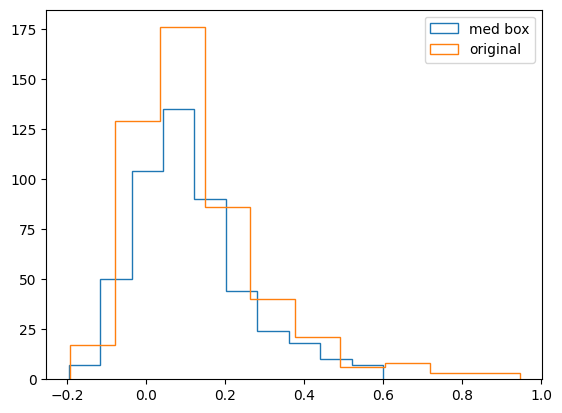

In [830]:
plt.hist(gals2["dgal2"],histtype="step",label="med box")
plt.hist(gals2["Dgal"],histtype="step",label="original")
plt.legend(loc="upper right")
plt.show()

In [834]:
# quick test
test = getDgal2(gals2["RA"].iloc[0:10],gals2["DEC"].iloc[0:10],gals2["z"].iloc[0:10],file)

(15, 15)
(15, 15)
(15, 15)
(15, 15)
(15, 15)
(15, 15)
(15, 15)
(15, 15)
(15, 15)
(15, 15)


In [835]:
file.close()

## quick getter for images 

write up a quick thing for the good pairs 

and make text file


get the images 
- acs cutouts 
- other HST stuff




In [1273]:
pairss_good

,ID,RA,DEC,z,M,SFR,Dgal,Rnorm,NUV,u,r,J,sSFR,dgal2,IRAC1,IRAC2,struc,NUVr,rJ
35,381028,149.963318,1.785379,2.3980,9.34175,1.703620,0.103908,8.438077,-20.944,-21.514,-21.767,-21.644,-7.638130,0.129081,23.409565,23.453878,2,0.823,-0.123
38,384103,149.965960,1.788798,2.3873,9.16240,0.912620,0.006851,8.337901,-19.257,-20.284,-20.636,-20.416,-8.249780,0.031316,24.437756,24.671043,2,1.379,-0.220
224,600078,149.836594,1.996312,2.5496,9.63143,2.285140,0.047033,4.762230,-21.183,-21.819,-22.140,-22.507,-7.346290,0.044903,22.791355,22.712954,2,0.957,0.367
227,601602,149.839508,1.998243,2.5460,9.38620,1.407010,0.038479,4.669472,-21.118,-21.501,-21.584,-21.024,-7.979190,0.017369,23.517859,24.195160,2,0.466,-0.560
366,754726,149.953910,2.142624,2.4226,9.21264,1.114290,0.420315,0.975400,-20.164,-21.119,-21.104,-21.085,-8.098350,0.397473,23.988888,24.038116,2,0.940,-0.019
367,754815,149.955840,2.142755,2.4193,9.09270,1.440980,0.410103,0.948840,-20.168,-20.994,-21.226,-20.934,-7.651720,0.371280,24.095522,24.171331,2,1.058,-0.292
430,824437,149.988956,2.206343,2.4638,9.34645,1.413680,0.146612,2.268938,-19.522,-21.041,-21.366,-21.495,-7.932770,0.147666,24.012222,23.648621,7,1.844,0.129
432,827014,149.988346,2.207023,2.4598,10.55340,2.298650,0.235712,2.212265,-21.623,-22.993,-23.717,-23.975,-8.254750,0.183436,21.262106,21.157040,7,2.094,0.258
435,832715,149.992927,2.213561,2.4236,10.61450,1.379840,0.320166,2.392908,-20.284,-21.590,-22.680,-23.306,-9.234660,0.320166,21.966896,21.792702,7,2.396,0.626
438,834502,149.988856,2.214684,2.4262,10.66170,1.867130,0.374405,2.108890,-20.462,-22.267,-23.168,-23.606,-8.794570,0.361363,21.607420,21.502150,7,2.706,0.438


In [1231]:
pairtog

,ID1,M1,SFR1,ID2,M2,SFR2,mratio
0,381028.0,9.34175,1.70362,384103.0,9.16240,0.912620,1.511298
1,600078.0,9.63143,2.28514,601602.0,9.38620,1.407010,1.758855
2,754726.0,9.21264,1.11429,754815.0,9.09270,1.440980,1.318075
3,824437.0,9.34645,1.41368,827014.0,10.55340,2.298650,16.104602
4,832715.0,10.61450,1.37984,834502.0,10.66170,1.867130,1.114808
5,861246.0,10.96170,1.85307,863839.0,9.99361,2.300490,9.291589
6,861246.0,10.96170,1.85307,861620.0,10.12400,2.099050,6.881768
7,861620.0,10.12400,2.09905,863839.0,9.99361,2.300490,1.350175
8,917014.0,9.99140,1.57831,917244.0,10.22250,2.237740,1.702550
9,960782.0,10.12890,1.58933,963687.0,10.62030,1.504380,3.100273


In [1233]:
#pairss_good

In [1234]:
skips = [861620,863839]

In [1236]:
finals = []
for x in range(len(pairtog)):
    if pairtog["M1"].iloc[x] > pairtog["M2"].iloc[x]:
        if pairtog["ID1"].iloc[x] in finals or pairtog["ID1"].iloc[x] in skips:
            continue
        else:
            finals.append(pairtog["ID1"].iloc[x])
    else:
        if pairtog["ID2"].iloc[x] in finals or pairtog["ID2"].iloc[x] in skips:
            continue
        else:
            finals.append(pairtog["ID2"].iloc[x])
            
            
print(finals)
print(len(finals))

[381028.0, 600078.0, 754726.0, 827014.0, 834502.0, 861246.0, 917244.0, 963687.0, 1004089.0, 1006557.0, 1017620.0, 1116891.0, 1260645.0]
13


In [1261]:
# get the image stuff

img_stuff = []

for x in range(len(pairss_good)):
    for y in finals:
        if pairss_good["ID"].iloc[x] ==y:
            img_stuff.append([pairss_good["ID"].iloc[x],pairss_good["RA"].iloc[x],pairss_good["DEC"].iloc[x]])
                         
                         
print(len(img_stuff)) # should be 15 - 1 - 2 = 12! --> actually 13 cuz one with two different is slightly different

13


In [1262]:
img_stuff[0]

[381028, 149.963318, 1.785379]

In [1272]:
print(img_stuff[8])

[1004089, 150.156333, 2.36949]


In [1263]:
path = "/Users/finngiddings/Documents/699-1/Data/IMG/GROG/"


In [1264]:
file = open(path+"pairSSgood.txt","w")

In [1265]:
file.write("object\tRA\tDEC\n")

14

In [1266]:
for x in img_stuff:
    file.write(str(x[0])+"\t"+str(x[1])+"\t"+str(x[2])+"\n")

In [1267]:
file.close()

### quick text maker for latex 

for the true 15 good pairs 

In [1314]:
len(pairss_good)

26

In [1315]:
pairtog

,ID1,M1,SFR1,ID2,M2,SFR2,mratio
0,381028.0,9.34175,1.70362,384103.0,9.16240,0.912620,1.511298
1,600078.0,9.63143,2.28514,601602.0,9.38620,1.407010,1.758855
2,754726.0,9.21264,1.11429,754815.0,9.09270,1.440980,1.318075
3,824437.0,9.34645,1.41368,827014.0,10.55340,2.298650,16.104602
4,832715.0,10.61450,1.37984,834502.0,10.66170,1.867130,1.114808
5,861246.0,10.96170,1.85307,863839.0,9.99361,2.300490,9.291589
6,861246.0,10.96170,1.85307,861620.0,10.12400,2.099050,6.881768
7,861620.0,10.12400,2.09905,863839.0,9.99361,2.300490,1.350175
8,917014.0,9.99140,1.57831,917244.0,10.22250,2.237740,1.702550
9,960782.0,10.12890,1.58933,963687.0,10.62030,1.504380,3.100273


In [1316]:
# get masses 
ras = []
decs = []
#qflags = []
zs = []

for x in pairss_dub_corr:
    temp = [0,0]
    temp2 = [0,0]
    temp3 = [0,0]
    for y in range(len(pairss_good)):
        if x[0] == pairss_good["ID"].iloc[y]:
            temp[0] = pairss_good["RA"].iloc[y]
            temp2[0] = pairss_good["DEC"].iloc[y]
            temp3[0] = pairss_good["z"].iloc[y]
        if x[1] == pairss_good["ID"].iloc[y]:
            temp[1] = pairss_good["RA"].iloc[y]
            temp2[1] = pairss_good["DEC"].iloc[y]
            temp3[1] = pairss_good["z"].iloc[y]
    ras.append(temp)
    decs.append(temp2)
    zs.append(temp3)
print(np.shape(zs))

(15, 2)


In [1317]:
ra1 = []
ra2 = []
for x in ras:
    ra1.append(x[0])
    ra2.append(x[1])
    
dec1 = []
dec2 = []
for x in decs:
    dec1.append(x[0])
    dec2.append(x[1])
    
z1 = []
z2 = []
for x in zs:
    z1.append(x[0])
    z2.append(x[1])

In [1318]:
pairtog["ra1"] = ra1
pairtog["dec1"]= dec1
pairtog["z1"] = z1

pairtog["ra2"] = ra2
pairtog["dec2"]= dec2
pairtog["z2"] = z2

In [1319]:
pairtog

,ID1,M1,SFR1,ID2,M2,SFR2,mratio,ra1,dec1,z1,ra2,dec2,z2
0,381028.0,9.34175,1.70362,384103.0,9.16240,0.912620,1.511298,149.963318,1.785379,2.3980,149.965960,1.788798,2.3873
1,600078.0,9.63143,2.28514,601602.0,9.38620,1.407010,1.758855,149.836594,1.996312,2.5496,149.839508,1.998243,2.5460
2,754726.0,9.21264,1.11429,754815.0,9.09270,1.440980,1.318075,149.953910,2.142624,2.4226,149.955840,2.142755,2.4193
3,824437.0,9.34645,1.41368,827014.0,10.55340,2.298650,16.104602,149.988956,2.206343,2.4638,149.988346,2.207023,2.4598
4,832715.0,10.61450,1.37984,834502.0,10.66170,1.867130,1.114808,149.992927,2.213561,2.4236,149.988856,2.214684,2.4262
5,861246.0,10.96170,1.85307,863839.0,9.99361,2.300490,9.291589,149.993517,2.238552,2.4507,149.995055,2.239773,2.4466
6,861246.0,10.96170,1.85307,861620.0,10.12400,2.099050,6.881768,149.993517,2.238552,2.4507,149.995160,2.237341,2.4485
7,861620.0,10.12400,2.09905,863839.0,9.99361,2.300490,1.350175,149.995160,2.237341,2.4485,149.995055,2.239773,2.4466
8,917014.0,9.99140,1.57831,917244.0,10.22250,2.237740,1.702550,150.037210,2.289272,2.4439,150.035731,2.289592,2.4534
9,960782.0,10.12890,1.58933,963687.0,10.62030,1.504380,3.100273,150.251405,2.330694,2.4686,150.247733,2.332625,2.4700


In [1320]:
file = open("/Users/finngiddings/Documents/699-1/Data/Master COSMOS/master_specz_COSMOS_BF_v2.cat","r")
string = file.read()
lst = string.splitlines()
file.close()

In [1323]:
qflags= []
for y in range(len(pairtog)):
    test = [0,0]
    for x in lst:
        temp = x.split()
        if int(temp[0]) == pairtog["ID1"].iloc[y]:
            test[0] = float(temp[13])
        elif int(temp[0]) == pairtog["ID2"].iloc[y]:
            test[1] = float(temp[13])
    qflags.append(test)
                
                
print(np.shape(qflags))

(15, 2)


In [1325]:
    
qf1 = []
qf2 = []
for x in qflags:
    qf1.append(x[0])
    qf2.append(x[1])

In [1326]:
pairtog["qf1"] = qf1
pairtog["qf2"] = qf2

In [1327]:
pairtog

,ID1,M1,SFR1,ID2,M2,SFR2,mratio,ra1,dec1,z1,ra2,dec2,z2,qf1,qf2
0,381028.0,9.34175,1.70362,384103.0,9.16240,0.912620,1.511298,149.963318,1.785379,2.3980,149.965960,1.788798,2.3873,2.5,212.0
1,600078.0,9.63143,2.28514,601602.0,9.38620,1.407010,1.758855,149.836594,1.996312,2.5496,149.839508,1.998243,2.5460,2.5,2.5
2,754726.0,9.21264,1.11429,754815.0,9.09270,1.440980,1.318075,149.953910,2.142624,2.4226,149.955840,2.142755,2.4193,3.0,2.0
3,824437.0,9.34645,1.41368,827014.0,10.55340,2.298650,16.104602,149.988956,2.206343,2.4638,149.988346,2.207023,2.4598,4.0,4.0
4,832715.0,10.61450,1.37984,834502.0,10.66170,1.867130,1.114808,149.992927,2.213561,2.4236,149.988856,2.214684,2.4262,14.0,4.0
5,861246.0,10.96170,1.85307,863839.0,9.99361,2.300490,9.291589,149.993517,2.238552,2.4507,149.995055,2.239773,2.4466,4.0,4.0
6,861246.0,10.96170,1.85307,861620.0,10.12400,2.099050,6.881768,149.993517,2.238552,2.4507,149.995160,2.237341,2.4485,4.0,3.0
7,861620.0,10.12400,2.09905,863839.0,9.99361,2.300490,1.350175,149.995160,2.237341,2.4485,149.995055,2.239773,2.4466,3.0,4.0
8,917014.0,9.99140,1.57831,917244.0,10.22250,2.237740,1.702550,150.037210,2.289272,2.4439,150.035731,2.289592,2.4534,3.0,14.0
9,960782.0,10.12890,1.58933,963687.0,10.62030,1.504380,3.100273,150.251405,2.330694,2.4686,150.247733,2.332625,2.4700,4.0,14.0


In [1335]:
for x in range(len(pairtog)):
    print(int(pairtog["ID1"].iloc[x]),"&",pairtog["ra1"].iloc[x],"&",pairtog["dec1"].iloc[x],"&",pairtog["z1"].iloc[x],"&",pairtog["M1"].iloc[x],"&",pairtog["qf1"].iloc[x],"\\")
    print(int(pairtog["ID2"].iloc[x]),"&",pairtog["ra2"].iloc[x],"&",pairtog["dec2"].iloc[x],"&",pairtog["z2"].iloc[x],"&",pairtog["M2"].iloc[x],"&",pairtog["qf2"].iloc[x],"\\")
    print("\hline")

381028 & 149.963318 & 1.785379 & 2.398 & 9.34175 & 2.5 \
384103 & 149.96596 & 1.788798 & 2.3873 & 9.1624 & 212.0 \
\hline
600078 & 149.836594 & 1.996312 & 2.5496 & 9.63143 & 2.5 \
601602 & 149.839508 & 1.998243 & 2.546 & 9.3862 & 2.5 \
\hline
754726 & 149.95391 & 2.142624 & 2.4226 & 9.21264 & 3.0 \
754815 & 149.95584 & 2.142755 & 2.4193 & 9.0927 & 2.0 \
\hline
824437 & 149.988956 & 2.206343 & 2.4638 & 9.34645 & 4.0 \
827014 & 149.988346 & 2.207023 & 2.4598 & 10.5534 & 4.0 \
\hline
832715 & 149.992927 & 2.213561 & 2.4236 & 10.6145 & 14.0 \
834502 & 149.988856 & 2.214684 & 2.4262 & 10.6617 & 4.0 \
\hline
861246 & 149.993517 & 2.238552 & 2.4507 & 10.9617 & 4.0 \
863839 & 149.995055 & 2.239773 & 2.4466 & 9.99361 & 4.0 \
\hline
861246 & 149.993517 & 2.238552 & 2.4507 & 10.9617 & 4.0 \
861620 & 149.99516 & 2.237341 & 2.4485 & 10.124 & 3.0 \
\hline
861620 & 149.99516 & 2.237341 & 2.4485 & 10.124 & 3.0 \
863839 & 149.995055 & 2.239773 & 2.4466 & 9.99361 & 4.0 \
\hline
917014 & 150.03721 & 2.28